In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno
from bokeh.core.properties import value
from bokeh.io import show,output_notebook
from bokeh.plotting import figure
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.layouts import row

In [68]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 600)  

In [2]:
%matplotlib inline

In [3]:
output_notebook()

Loading BokehJS ...

In [17]:
df = pd.read_csv('lotr.csv')
script = pd.read_csv("lotrscript.csv")

In [18]:
df[df =="Unknow"] = np.nan
df[df =="Unknown"] = np.nan
col = ['birth','death','gender','hair','height','name','race','realm','spouse']

In [19]:
df.head(5)

,birth,death,gender,hair,height,name,race,realm,spouse
0,NaN,NaN,Female,NaN,NaN,Adanel,Men,NaN,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),NaN,Boromir,Men,NaN,NaN
2,NaN,"March ,3019",Male,NaN,NaN,Lagduf,Orcs,NaN,NaN
3,TA 280,TA 515,Male,NaN,NaN,Tarcil,Men,Arnor,Unnamed wife
4,NaN,NaN,Male,NaN,NaN,Fire-drake of Gondolin,Dragon,NaN,NaN


In [20]:
# delete useless symbols in datasets
for i in df:    
    df[i] = df[i].str.replace(r"\,\[.*\]","").str.replace(re.escape(", ?"),"").str.replace(re.escape(",?"),"").str.replace(re.escape(",,"),"").str.replace(r"\, \(.*\)","").str.replace(re.escape("?"),"").str.replace(re.escape(", ,"),"")
for i in range(len(script['char'])):
    script['char'][i] = script['char'][i][0:script['char'][i].index(':')]
for i in script:
    script[i]=script[i].str.replace("�","\'").str.replace(re.escape(",\r\n"),"").str.replace(re.escape("\r\n"),"").str.replace("Movie Script","")
for i in range(len(script["char"])):
    script["char"][i] = script["char"][i].replace(re.escape("("),"").replace(re.escape(")"),"")

In [21]:
df.describe()

,birth,death,gender,hair,height,name,race,realm,spouse
count,704,596,768,177,98,911,771,197,508
unique,458,389,5,86,52,911,47,75,215
top,"Late ,Third Age",Immortal,Male,Dark,Tall,Merimac Brandybuck,Men,Gondor,Unnamed wife
freq,49,22,630,29,39,1,388,33,237


In [22]:
script.head()

,char,dialog,movie
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,DEAGOL,Arrghh!,The Return of the King
3,SMEAGOL,Deagol!,The Return of the King
4,SMEAGOL,Deagol!,The Return of the King


In [32]:
script.to_csv("script.csv")

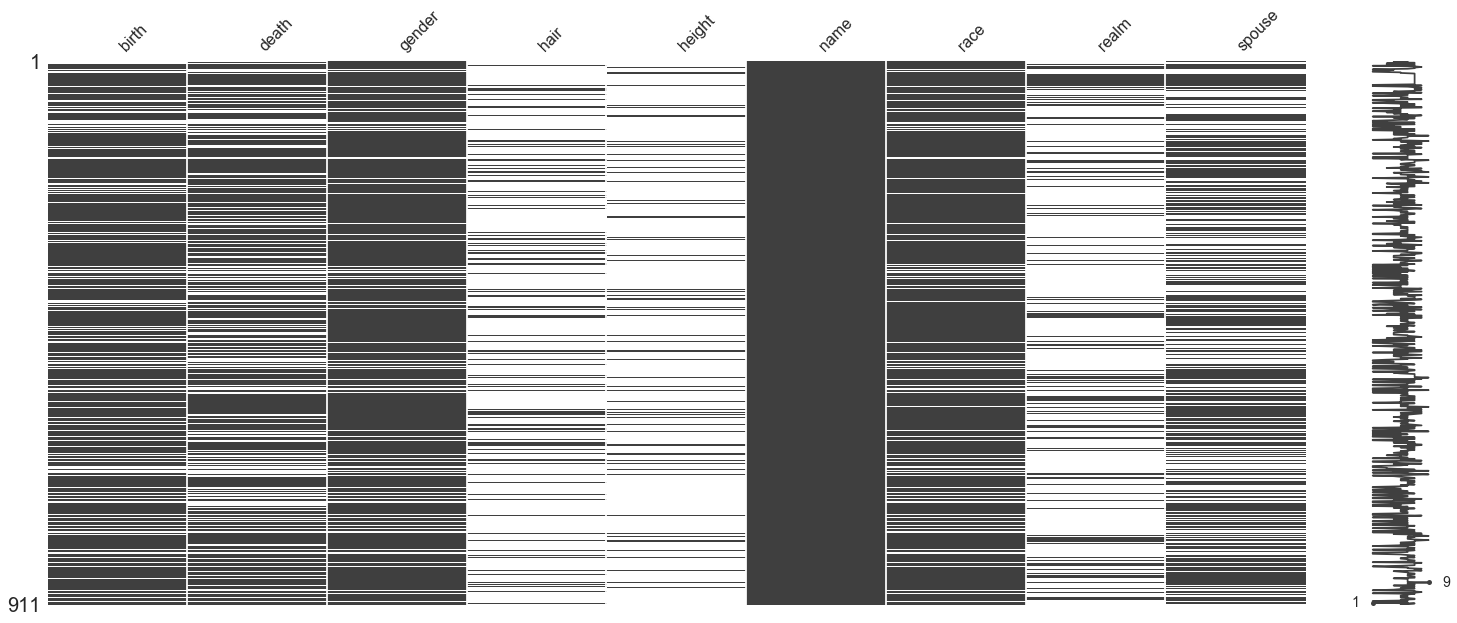

In [23]:
#check missing value
msno.matrix(df )

# RACE

In [29]:
race_ = df.copy()

In [31]:
#delete rows that race is null
race_ = race_[~race_.race.isnull()]
race_ = race_.reset_index(drop=True)
race_.head()

,birth,death,gender,hair,height,name,race,realm,spouse
0,NaN,NaN,Female,NaN,NaN,Adanel,Men,NaN,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),NaN,Boromir,Men,NaN,NaN
2,NaN,"March ,3019",Male,NaN,NaN,Lagduf,Orcs,NaN,NaN
3,TA 280,TA 515,Male,NaN,NaN,Tarcil,Men,Arnor,Unnamed wife
4,NaN,NaN,Male,NaN,NaN,Fire-drake of Gondolin,Dragon,NaN,NaN


In [32]:
#Unification of race
for i in range(len(race_["race"])):
    if "Men" in race_["race"][i]:
        race_["race"][i] = "Men"
    elif 'Hobbit' in race_["race"][i]:
        race_["race"][i] = "Hobbits"
    elif 'Orc' in race_["race"][i]:
        race_["race"][i] = "Orcs"
    elif 'Dwar' in race_["race"][i]:
        race_["race"][i] = "Dwarves"
    elif 'Dragon' in race_["race"][i]:
        race_["race"][i] = "Dragons"
    elif 'El' in race_["race"][i]:
        race_["race"][i] = "Elves"
    elif 'Half' in race_["race"][i]:
        race_["race"][i] = "Half-elven"
    elif 'Maiar' in race_["race"][i]:
        race_["race"][i] = "Maiar"
    else:
        race_["race"][i]=race_["race"][i]
    

In [189]:
# groupby race and gender, calculate count.
race_group = race_.groupby(["gender","race"])["name"].count()
race_group = race_group.reset_index()
race_group.head(3)

,gender,race,name
0,Female,Ainur,10
1,Female,Dwarves,1
2,Female,Elves,25


In [34]:
race = ["Men",'Hobbits','Elves','Dwarves','Dragons','Half-elven','Ainur','Orcs']

In [35]:
race_group = race_group[race_group['race'].isin(race)]
race_group = race_group[0:14]
race_group

,gender,race,name
0,Female,Ainur,10
1,Female,Dwarves,1
2,Female,Elves,25
4,Female,Half-elven,2
5,Female,Hobbits,41
6,Female,Men,52
8,Male,Ainur,14
11,Male,Dragons,6
13,Male,Dwarves,43
16,Male,Elves,80


In [36]:
# Draw Race vs Gender use plotly (might not visible on Github)

gender = ["Male","Female"]
race = ["Men",'Hobbits','Elves','Dwarves','Ainur','Orcs','Half-elven','Dragons']
colors = ["#3D3E40", "#B7AC49"]

data = {'race' : race,
        'Male'   : [340, 100, 80, 43,14, 13, 5, 6],
        'Female'   : [52, 41, 25, 1, 10, 0, 2, 0]}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips=[
    ("Male", "@Male"),
    ("Female","@Female")
])
p = figure(x_range=race, plot_width = 800, title="Race VS Gender",tools=[hover],
           toolbar_location=None)

p.vbar_stack(gender, x='race', width=0.9, color=colors, source=source,
             legend=[value(x) for x in gender])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"



show(p)

# Year

In [37]:
year = df

In [82]:
#delete rows that birth or death year is null
year = year[~year.birth.isnull()]
year = year[~year.death.isnull()]
year = year.reset_index(drop=True)

In [83]:
year1["birth"] = year1["birth"].map(lambda x : x.replace(",","").replace("Gondor",""))
year1["death"] = year1["death"].map(lambda x : x.replace(",","").replace("Gondor","").replace("Battle of Tumhalad","").replace("War of the Elves and Sauron",""))

In [85]:
year1 = pd.read_csv("year1.txt")

In [86]:
year1['birth_y'] = 0
year1['death_y'] = 0
year1['lifelong_y'] = 0

In [87]:
# change all birth year and death year to same chronology
for i in range(len(year1['birth'])):
    if year1['birth'][i][0:2] == "FA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])
    elif year1['birth'][i][0:2] == "SA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600
    elif year1['birth'][i][0:2] == "TA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600+3450
    elif year1['birth'][i][0:2] == "FO":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600+3450+3021
    elif year1['birth'][i][0:2] == "SA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600
    elif year1['birth'][i] == "Before CA":
        year1['birth_y'][i] = -1

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying t

In [88]:
for i in range(len(year1['birth'])):
    if year1['death'][i][0:2] == "FA":
        year1['death_y'][i] = int(year1['death'][i][3:])
    elif year1['death'][i][0:2] == "SA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600
    elif year1['death'][i][0:2] == "TA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600+3450
    elif year1['death'][i][0:2] == "FO":
        year1['death_y'][i] = int(year1['death'][i][3:])+600+3450+3021
    elif year1['death'][i][0:2] == "SA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600
    elif year1['death'][i] == "Immortal":
        year1['death_y'][i] = 7291
    elif year1['death'][i] == "Still alive":
        year1['death_y'][i] = 7291

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWa

In [89]:
year1['lifelong_y'] = year1['death_y']-year1['birth_y']
year1.head()

,Unnamed: 0,Unnamed: 0.1,birth,death,gender,hair,height,name,race,realm,spouse,birth_y,death_y,lifelong_y
0,0,3,FA 307,FA 398,Male,NaN,NaN,Malach,Men,NaN,Meldis,307,398,91
1,1,4,Before CA,FA 400,Male,Dark,Tall,Eöl,Elves,Nan Elmoth,Aredhel,-1,400,401
2,2,5,Before CA,FA 400,Female,Dark,Tall,Aredhel,Elves,NaN,Eöl,-1,400,401
3,3,6,FA 341,FA 420,Female,NaN,NaN,Haleth,Men,NaN,None,341,420,79
4,4,7,FA 338,FA 432,Male,NaN,NaN,Boromir (House of Bëor),Men,NaN,Unnamed wife,338,432,94


In [98]:
#create a dataframe that count how many characters in different race for each year.
a = {'years' : list(range(-1,7292)), 'elf' : list(np.zeros(7293)),'dra' : list(np.zeros(7293)),'men' : list(np.zeros(7293)),'hob' : list(np.zeros(7293))}
years = pd.DataFrame(a)

years['elf'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Elves') ]  )      )
years['men'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Men') ]  )      )
years['dra'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Dwarves') ]  )      )
years['hob'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Hobbits') ]  )      )

In [97]:
years.head()

,dra,elf,hob,men,years
0,0,25,0,0,-1
1,0,25,0,0,0
2,0,25,0,0,1
3,0,25,0,0,2
4,0,25,0,0,3


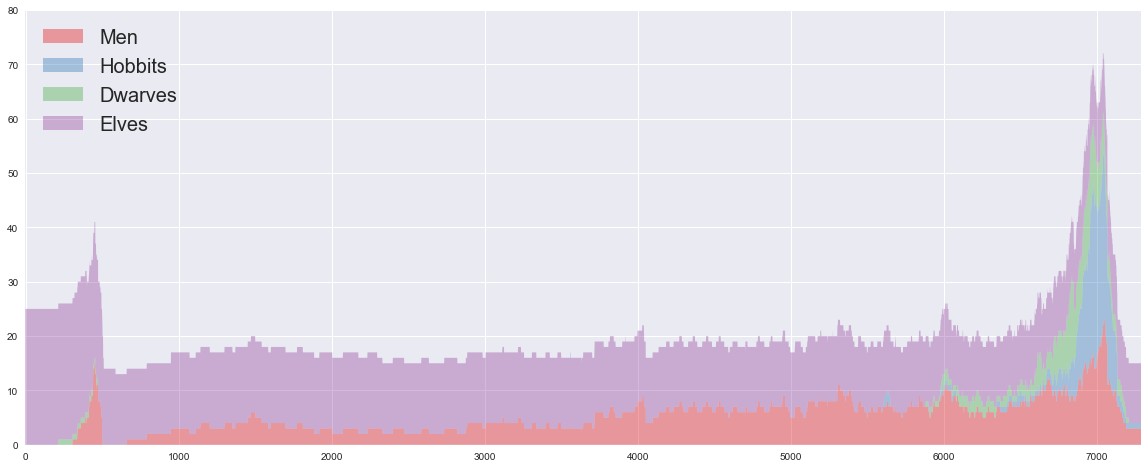

In [115]:
#Draw area plot shows population of different race by year
sns.mpl.rc("figure", figsize=(20,8))
elf = list(years["elf"])
men = list(years["men"])
hob = list(years["hob"])
dra = list(years["dra"])
y = [men,hob,dra,elf]
x = list(years["years"])
plt.stackplot(x,y, labels=['Men','Hobbits','Dwarves',"Elves"], colors=pal , alpha=0.4 )
plt.axis([-1, 7292, 0, 80])
plt.legend(loc=2, prop={'size': 20})
sns.mpl.rc("figure", figsize=(80,30))
#ax.axis([0, 10, 0, 10])
plt.show(p)


In [122]:
year_l = year1[year1['death']!= "Still alive"]
year_l = year_l[year1['death']!= "Immortal"]
year_l = year_l.reset_index(drop = True)

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [ ]:
#Unification of race 
for i in range(len(year_l["race"])):
    if "Dwar" in year_l["race"][i]:
        year_l["race"][i] = "Dwarves"
    elif 'Hobbit' in year_l["race"][i]:
        year_l["race"][i] = "Hobbits"
    elif 'Elf' in year_l["race"][i]:
        year_l["race"][i] = "Elves"
    elif 'Dwar' in year_l["race"][i]:
        year_l["race"][i] = "Dwarves"
    elif 'Balrog' in year_l["race"][i]:
        year_l["race"][i] = "Maiar,Balrog"
    elif 'Half-elven' in year_l["race"][i]:
        year_l["race"][i] = "Half-elven"

In [133]:
year_long = year_l.groupby("race").count()
year_long

,Unnamed: 0,Unnamed: 0.1,birth,death,gender,hair,height,name,realm,spouse,birth_y,death_y,lifelong_y
race,,,,,,,,,,,,,
Dragons,1,1,1,1,1,0,0,1,1,0,1,1,1
Dwarves,28,28,28,28,28,6,1,28,11,16,28,28,28
Elves,19,19,19,19,19,18,6,19,9,15,19,19,19
"Elves,Maiar",1,1,1,1,1,1,0,1,0,1,1,1,1
Half-elven,4,4,4,4,4,2,0,4,3,4,4,4,4
Hobbits,75,75,75,75,75,16,10,75,0,60,75,75,75
Maiar,2,2,2,2,2,2,1,2,1,2,2,2,2
"Maiar,Balrog",2,2,2,2,2,1,1,2,0,0,2,2,2
Men,209,209,209,209,208,38,17,209,107,191,209,209,209


In [134]:
year_long = year_l.groupby("race").mean()['lifelong_y']
year_long

race
Dragons         171.000000 
Dwarves         207.428571 
Elves           996.842105 
Elves,Maiar     504.000000 
Half-elven      893.000000 
Hobbits         100.400000 
Maiar           7070.000000
Maiar,Balrog    3790.500000
Men             159.526316 
Men,Rohirrim    74.000000  
Orc,Goblin      47.000000  
Uruk-hai        0.000000   
Werewolves      467.000000 
Name: lifelong_y, dtype: float64

In [139]:
#get the average life span for different race
year_long1 = pd.DataFrame(year_long)
year_long1 =year_long1.reset_index()
year_ll = year_long1.sort_values("lifelong_y",ascending=0)
year_ll = year_ll[year_ll["race"]!="Dragons"]
year_ll = year_ll[year_ll["race"]!="Uruk-hai"]
year_ll

,race,lifelong_y
6,Maiar,7070.000000
7,"Maiar,Balrog",3790.500000
2,Elves,996.842105
4,Half-elven,893.000000
3,"Elves,Maiar",504.000000
12,Werewolves,467.000000
1,Dwarves,207.428571
8,Men,159.526316
5,Hobbits,100.400000
9,"Men,Rohirrim",74.000000


In [140]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, Set3
from bokeh.plotting import figure

In [143]:
# Use bokeh to draw plot of average life span for different race (Might not shown on github)
x = list(year_ll["race"])
y = list(year_ll["lifelong_y"])
y = [int(i) for i in y]

source = ColumnDataSource(data=dict(x=x, y=y, color=Set3[12]))
hover = HoverTool(tooltips=[
    ("years", "@y")
])
p = figure(x_range=x, y_range=(0,8000), plot_height=700, plot_width = 800 ,title="Average Life Span",
           toolbar_location=None, tools=[hover])

p.vbar(x='x', top='y', width=0.9, color='color', legend="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
show(p)

/Users/tianyigu/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('color', 12), ('x', 11), ('y', 11)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [144]:
#average life span for different race exclude Maiar and Maiar,balrog
year_ll = year_ll.reset_index(drop = True)
year_l2 = year_ll.loc[2:,]
year_l2

,race,lifelong_y
2,Elves,996.842105
3,Half-elven,893.000000
4,"Elves,Maiar",504.000000
5,Werewolves,467.000000
6,Dwarves,207.428571
7,Men,159.526316
8,Hobbits,100.400000
9,"Men,Rohirrim",74.000000
10,"Orc,Goblin",47.000000


In [145]:
# Use bokeh to draw plot of average life span for different race exclude Maiar and Maiar,balrog(Might not shown on github)
x = list(year_l2["race"])
y = list(year_l2["lifelong_y"])
y = [int(i) for i in y]

source = ColumnDataSource(data=dict(x=x, y=y, color=Set3[9]))
hover = HoverTool(tooltips=[
    ("years", "@y")
])
p = figure(x_range=x, y_range=(0,1200), plot_height=700, plot_width = 800 ,title="Average Life Span",tools=[hover],
           toolbar_location=None)

p.vbar(x='x', top='y', width=0.9, color='color', legend="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
show(p)

# Marriage

In [149]:
# get data that included marriage info
spouse = df[~df.spouse.isnull()]
spouse = spouse[spouse.spouse != "None"]
spouse = spouse.reset_index(drop=True)
spouse.describe()

,birth,death,gender,hair,height,name,race,realm,spouse
count,451,384,463,98,46,465,461,155,465
unique,359,292,4,48,21,465,13,49,214
top,YT,Immortal,Male,Golden,Tall,Orodreth,Men,Gondor,Unnamed wife
freq,14,12,362,18,23,1,266,32,237


In [150]:
spouse.to_csv("spouse.csv")
df.to_csv("lotr.csv")

In [151]:
spouse = pd.read_csv("spouse2.csv")

In [153]:
#count if any characters married more than once
spouseg = spouse.groupby("spouse").count()["race"]
spouseg = pd.DataFrame(spouseg)
spouseg = spouseg.reset_index().sort_values("race",ascending=0)
spouseg.reset_index(drop = True)
spouseg.columns = ['Spouse name', 'Count']
spouseg.head()

,Spouse name,Count
186,Unnamed wife,240
185,Unnamed husband,3
66,Finwë,2
135,Nerdanel,1
126,Milo Burrows,1


In [155]:
#count how many characters married by race
spouse_r = spouse.groupby("race").count()["spouse"]
spouse_r = pd.DataFrame(spouse_r)
spouse_r = spouse_r.reset_index().sort_values("spouse",ascending=0)
spouse_r.reset_index(drop = True)
spouse_r.columns = ['Race', 'Count']
spouse_r.head()

,Race,Count
9,Men,251
8,Hobbits,81
2,Elves,52
1,Dwarves,16
0,Ainur,13


In [157]:
#count how many characters in total 
race_spo = race_.groupby(["race"])["name"].count()
race_spo = pd.DataFrame(race_spo)
race_spo = race_spo.reset_index().sort_values("name",ascending=0)
race_spo.reset_index(drop = True)
race_spo.columns = ['Race', 'Count']
race_spo.head()

,Race,Count
18,Men,395
15,Hobbits,142
8,Elves,108
5,Dwarves,44
0,Ainur,24


In [158]:
men_r = 251/395
hob_r = 94/142
elf_r = 52/108
dwa_r = 16/44
orc_r = 0

In [188]:
# create different pie charts about marriage ratio, will combine them togather use photoshop
sns.mpl.rc("figure", figsize=(40,40))
names='married', 'unmarried'
size=[251,144]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.8, color='white')


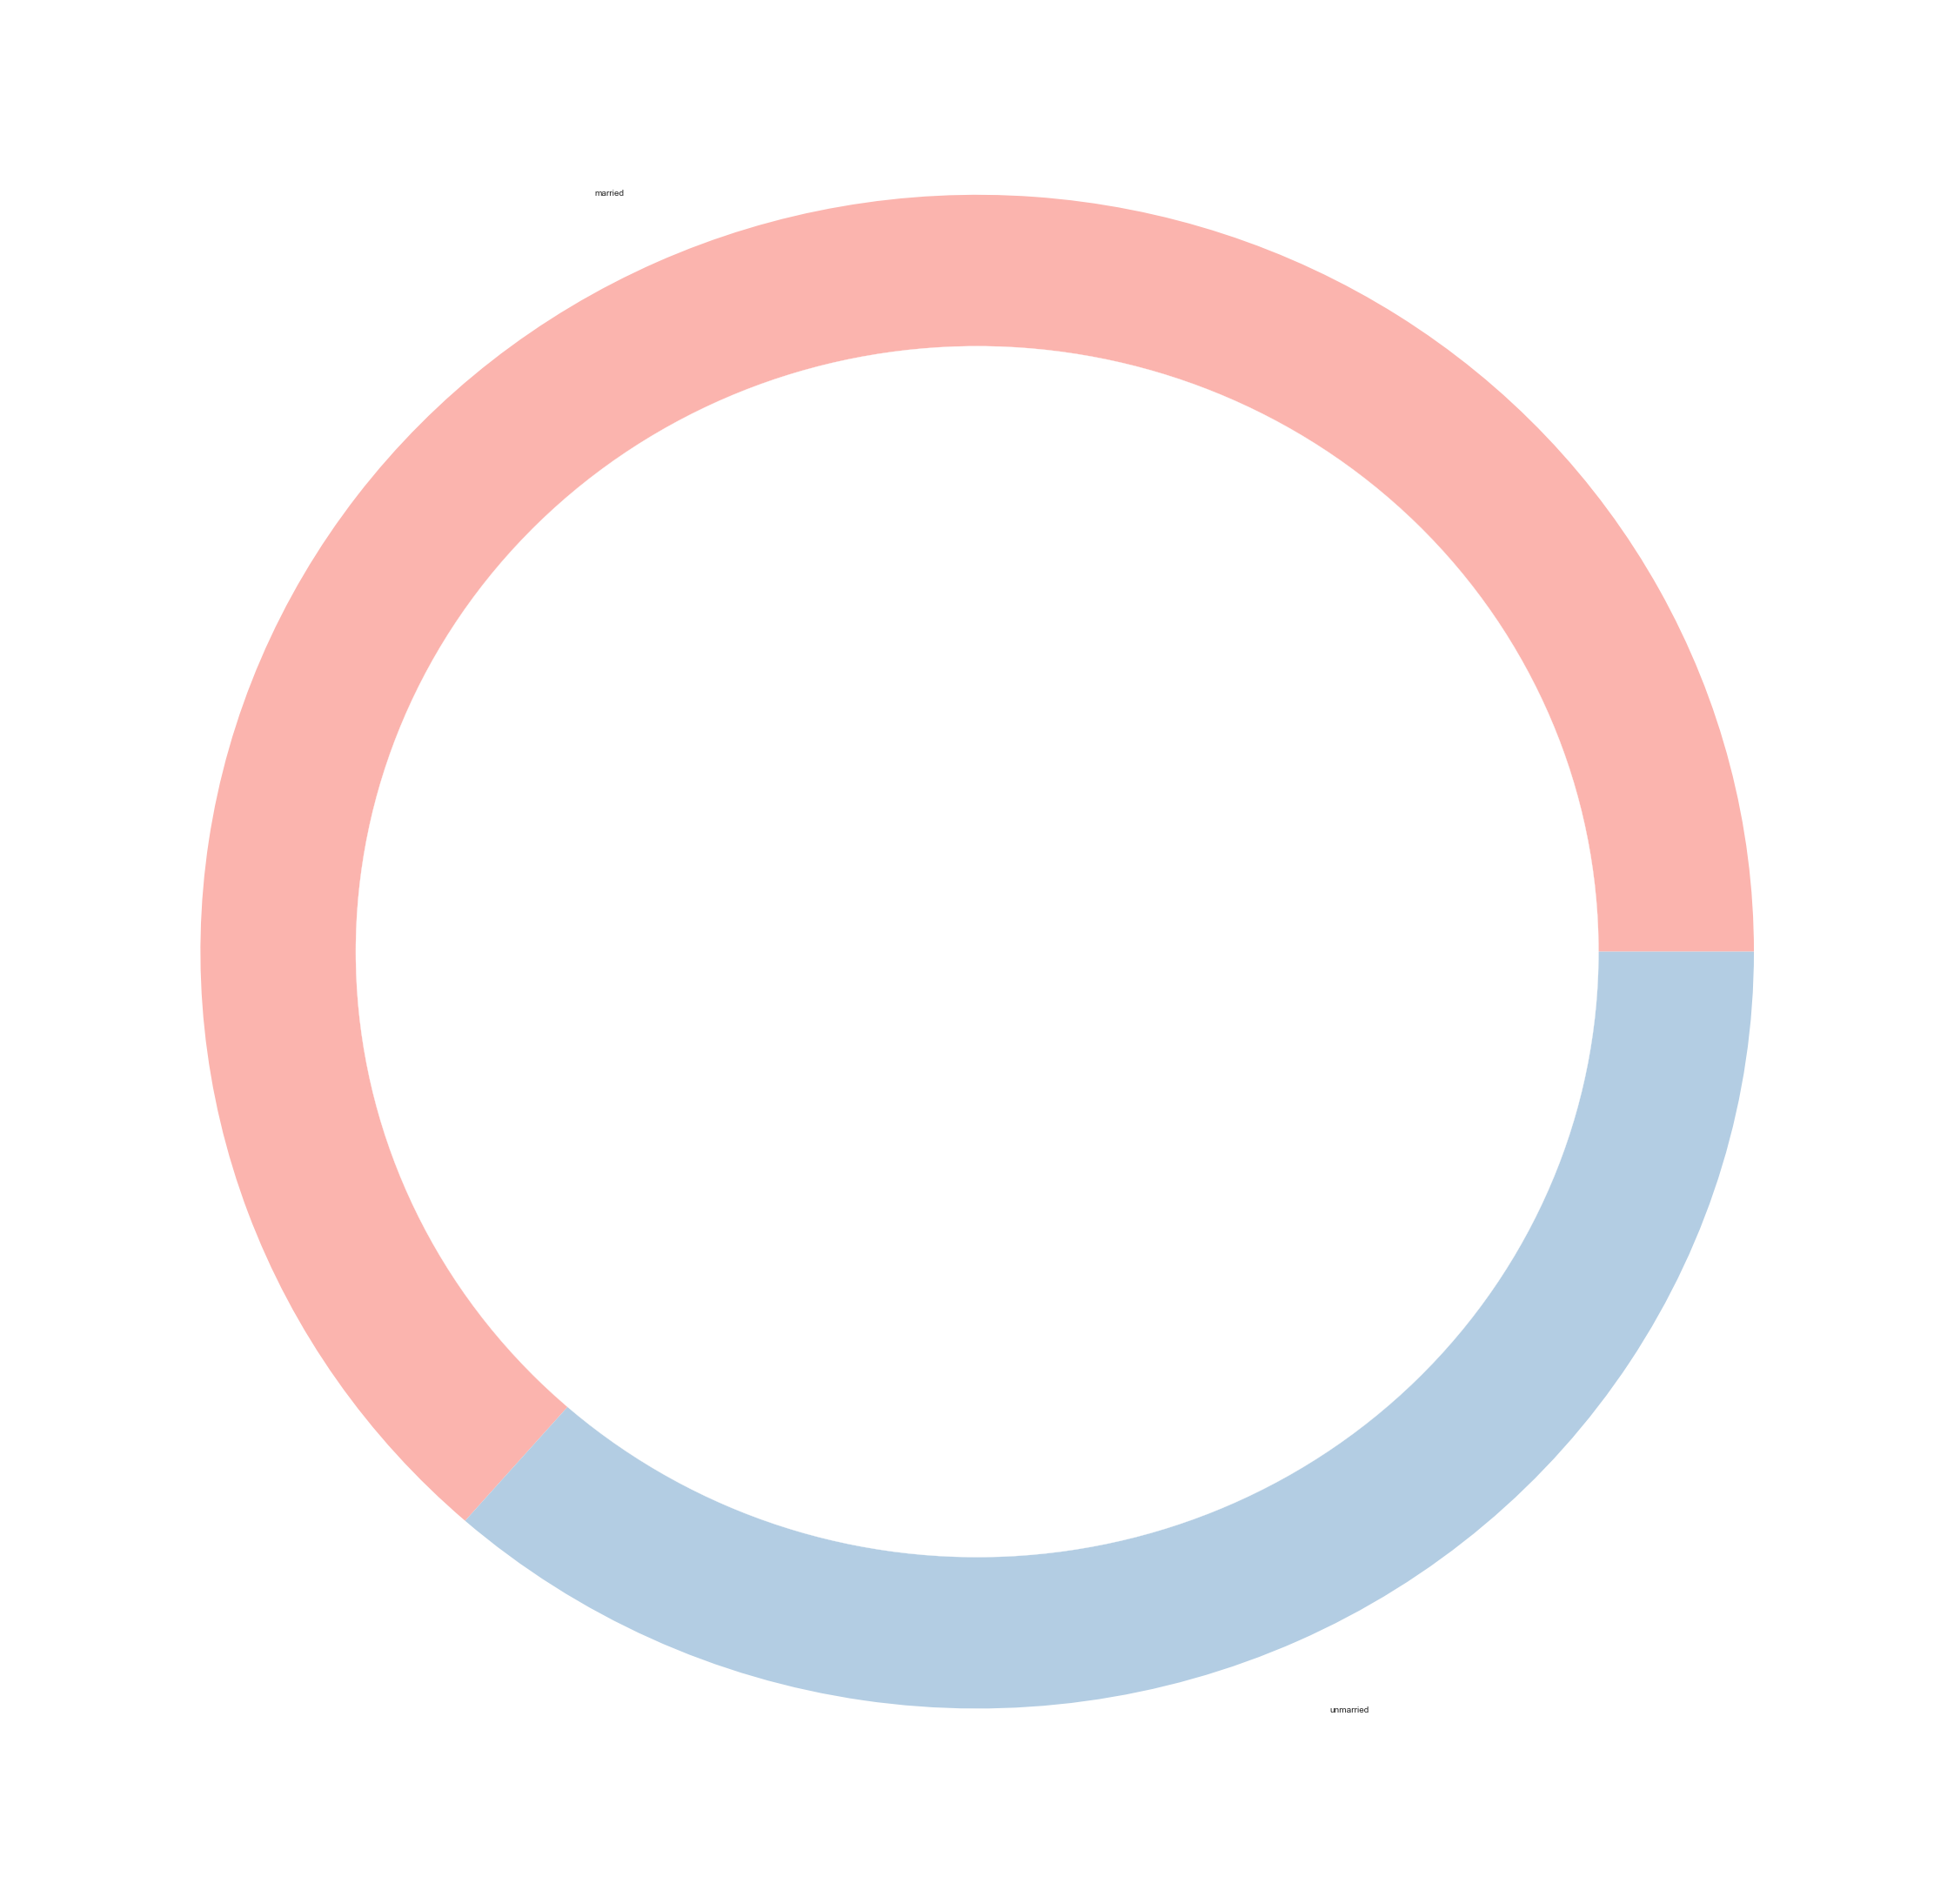

In [165]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

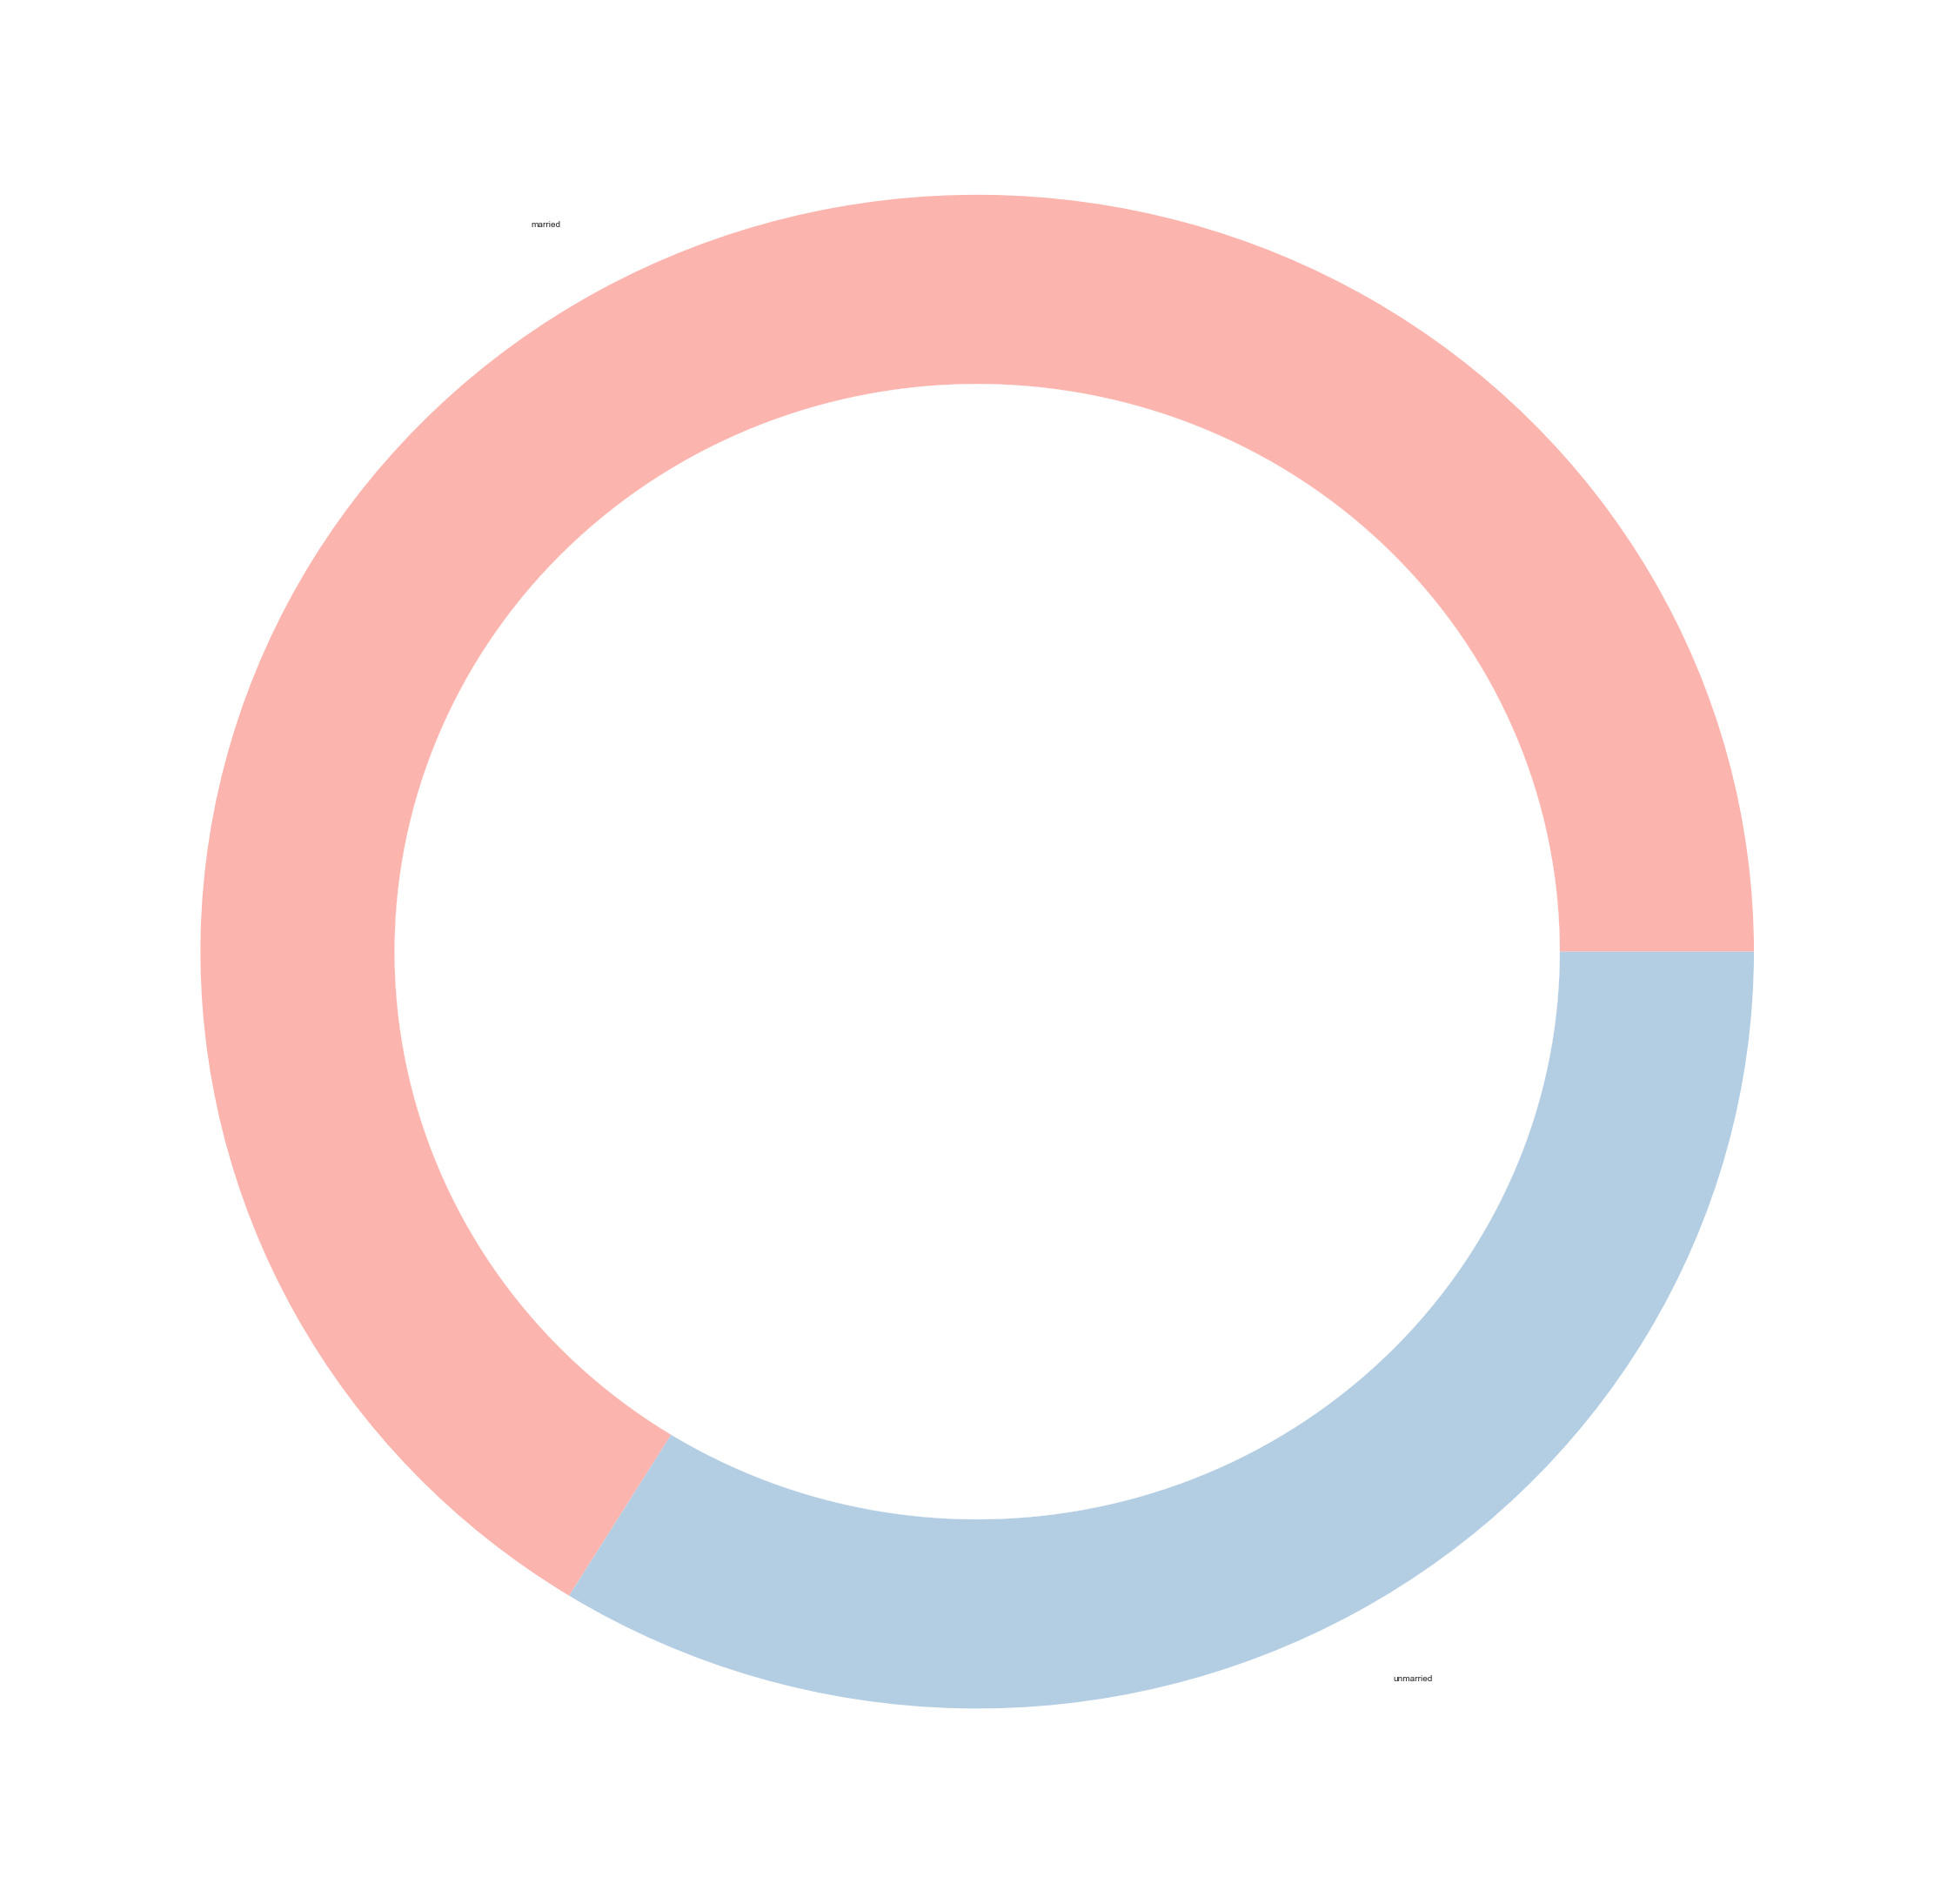

In [166]:
names='married', 'unmarried'
size=[94,48]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.75, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

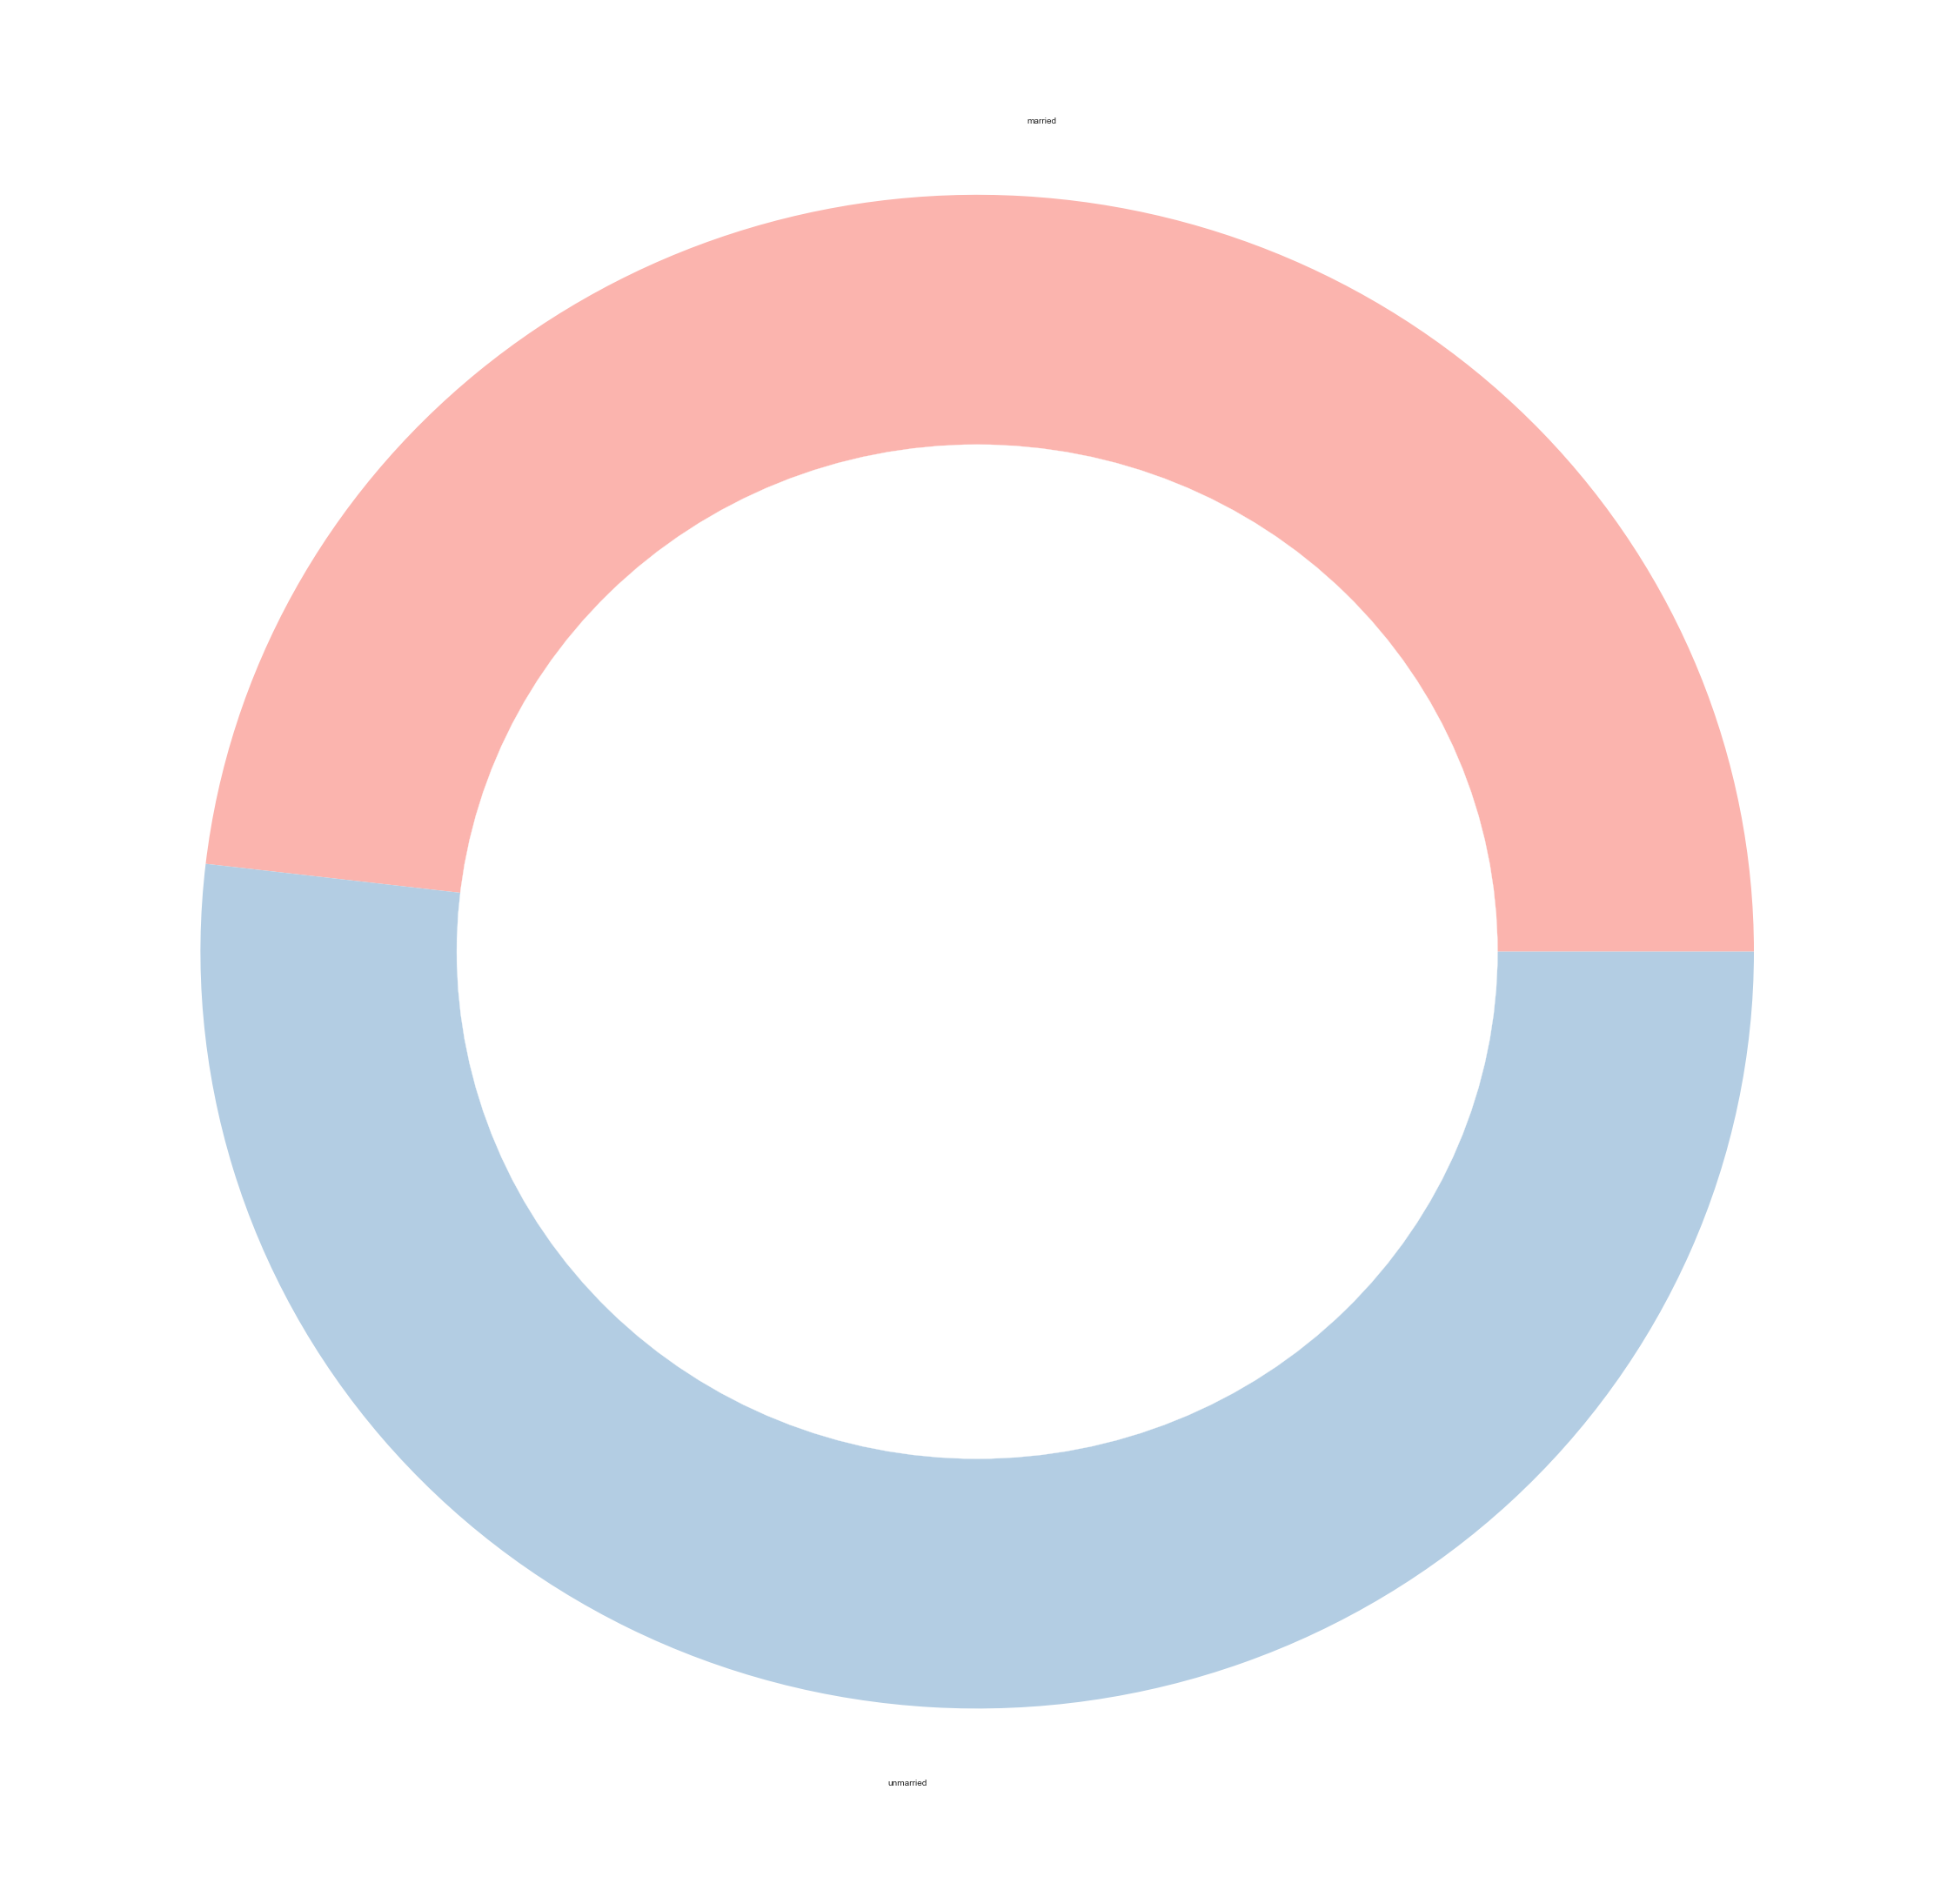

In [167]:
names='married', 'unmarried'
size=[52,56]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.67, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

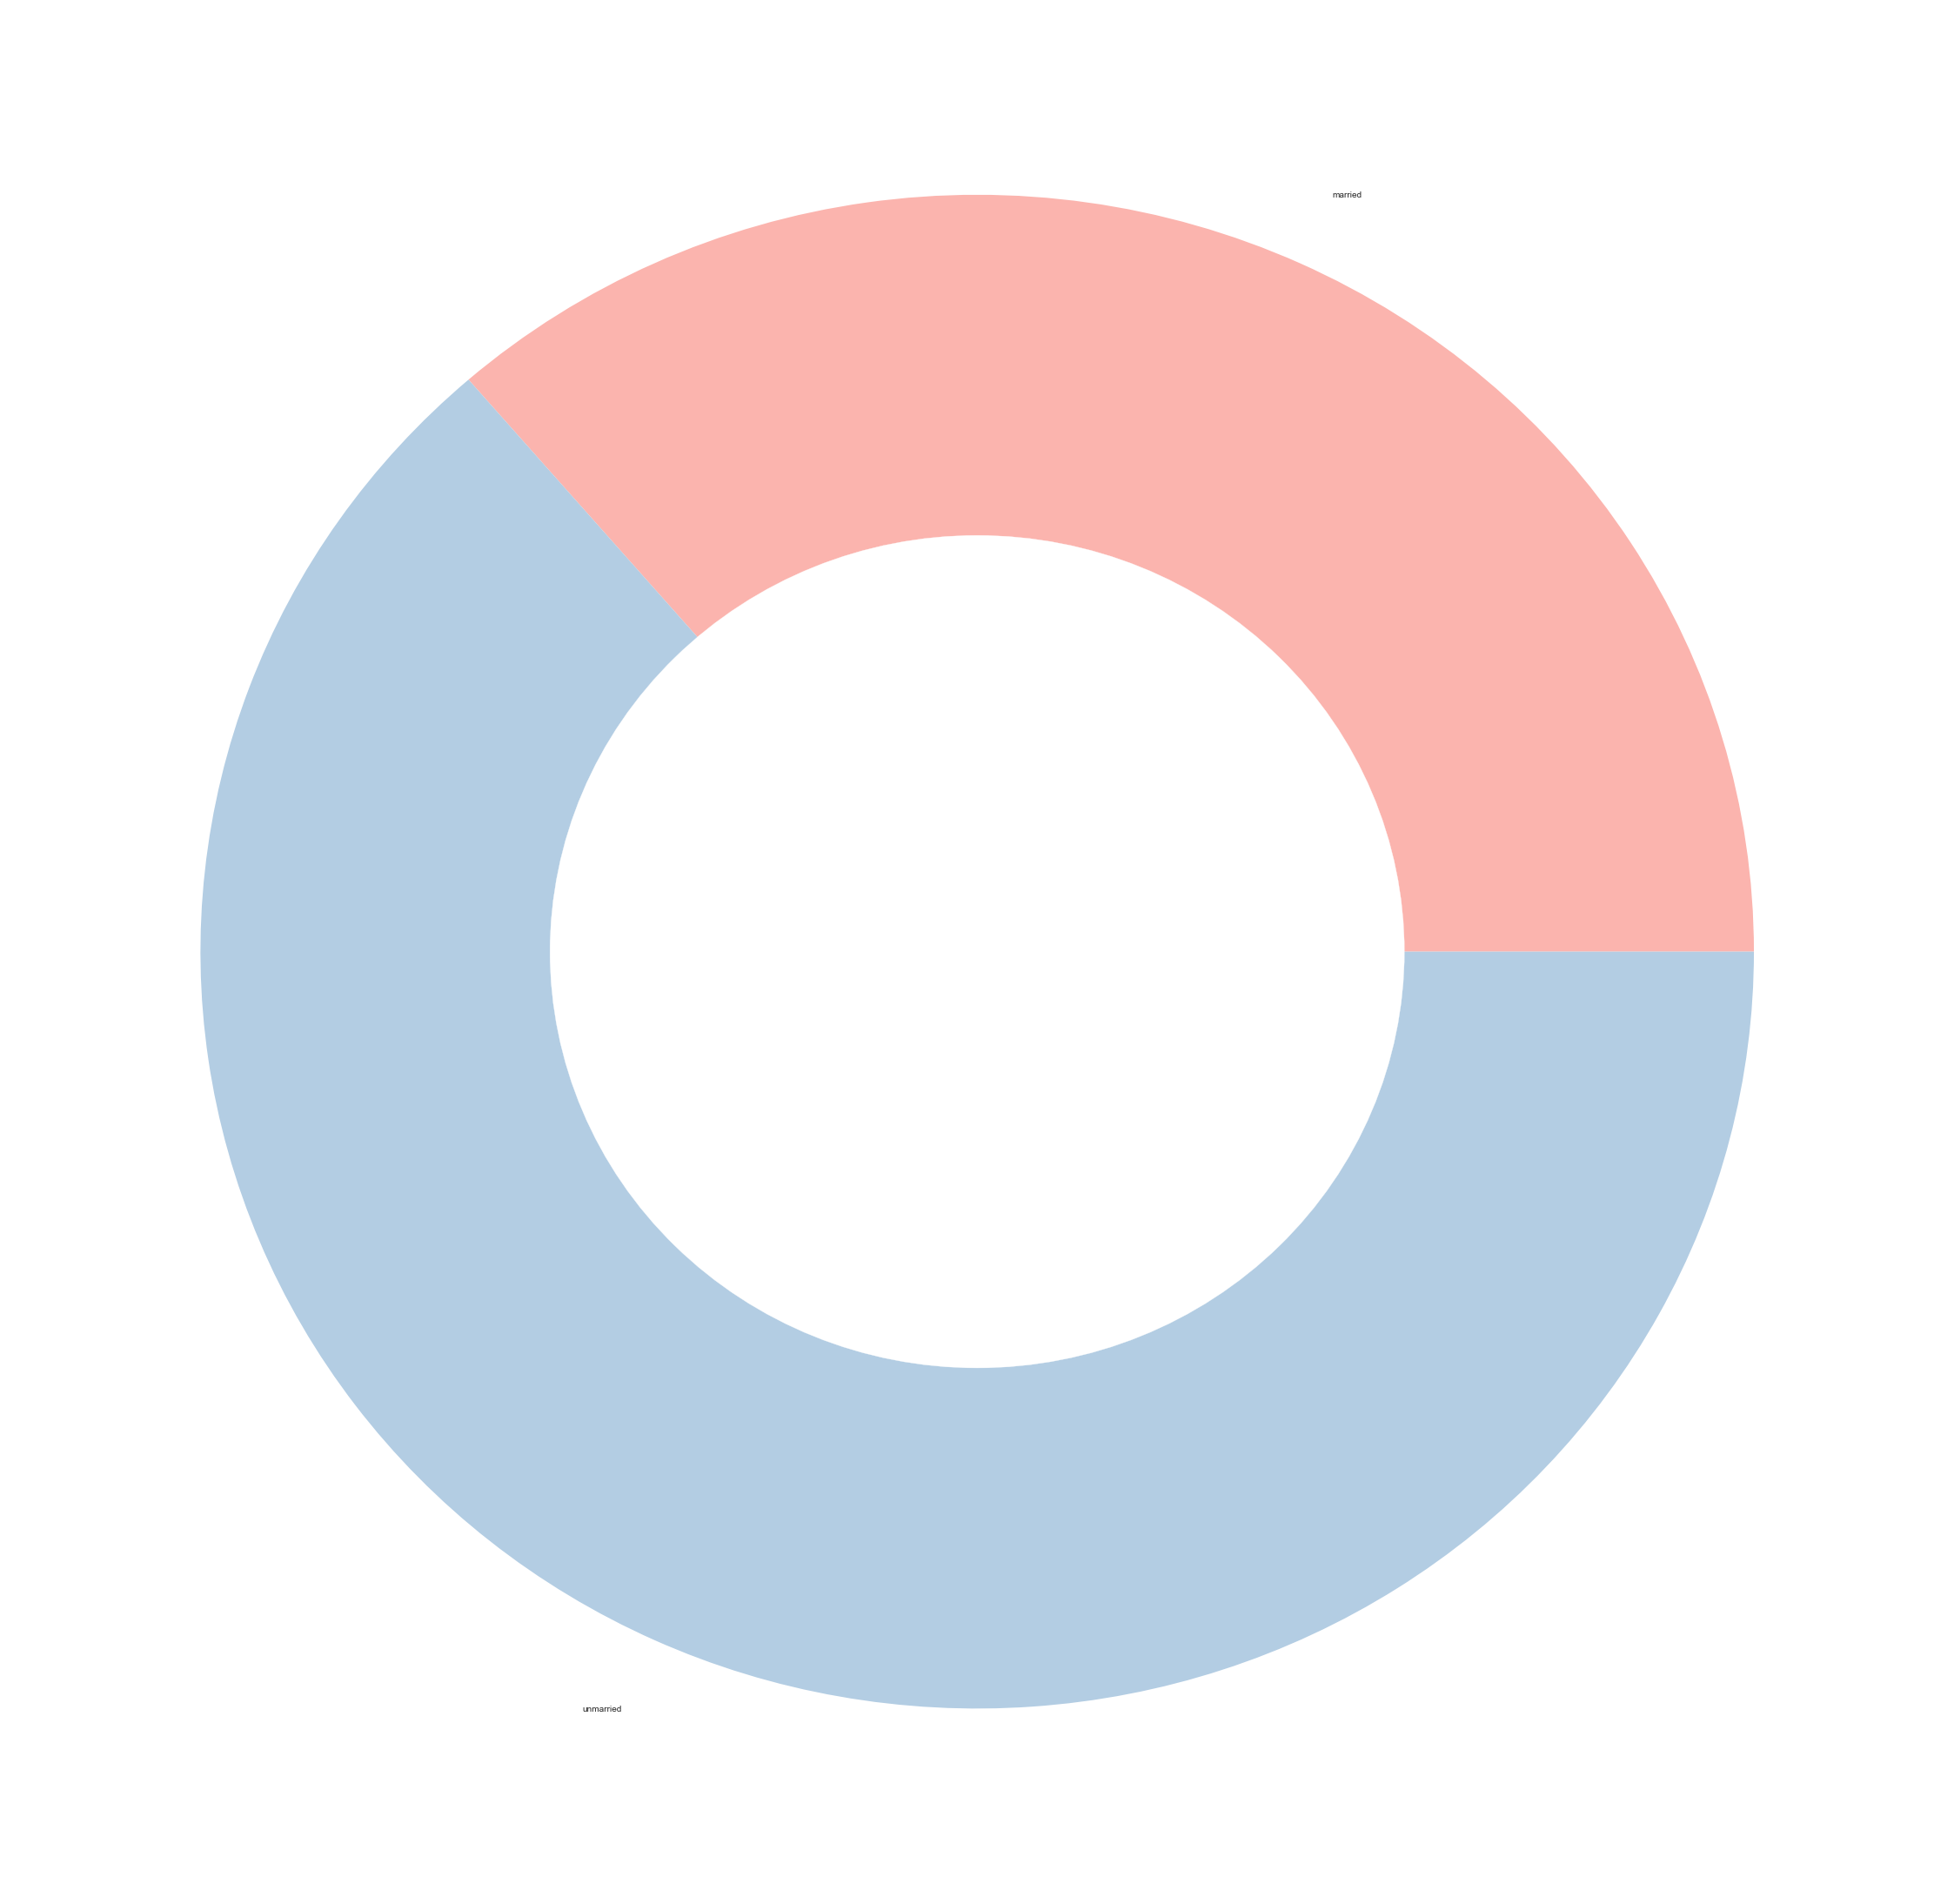

In [168]:
names='married', 'unmarried'
size=[16,28]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.55, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

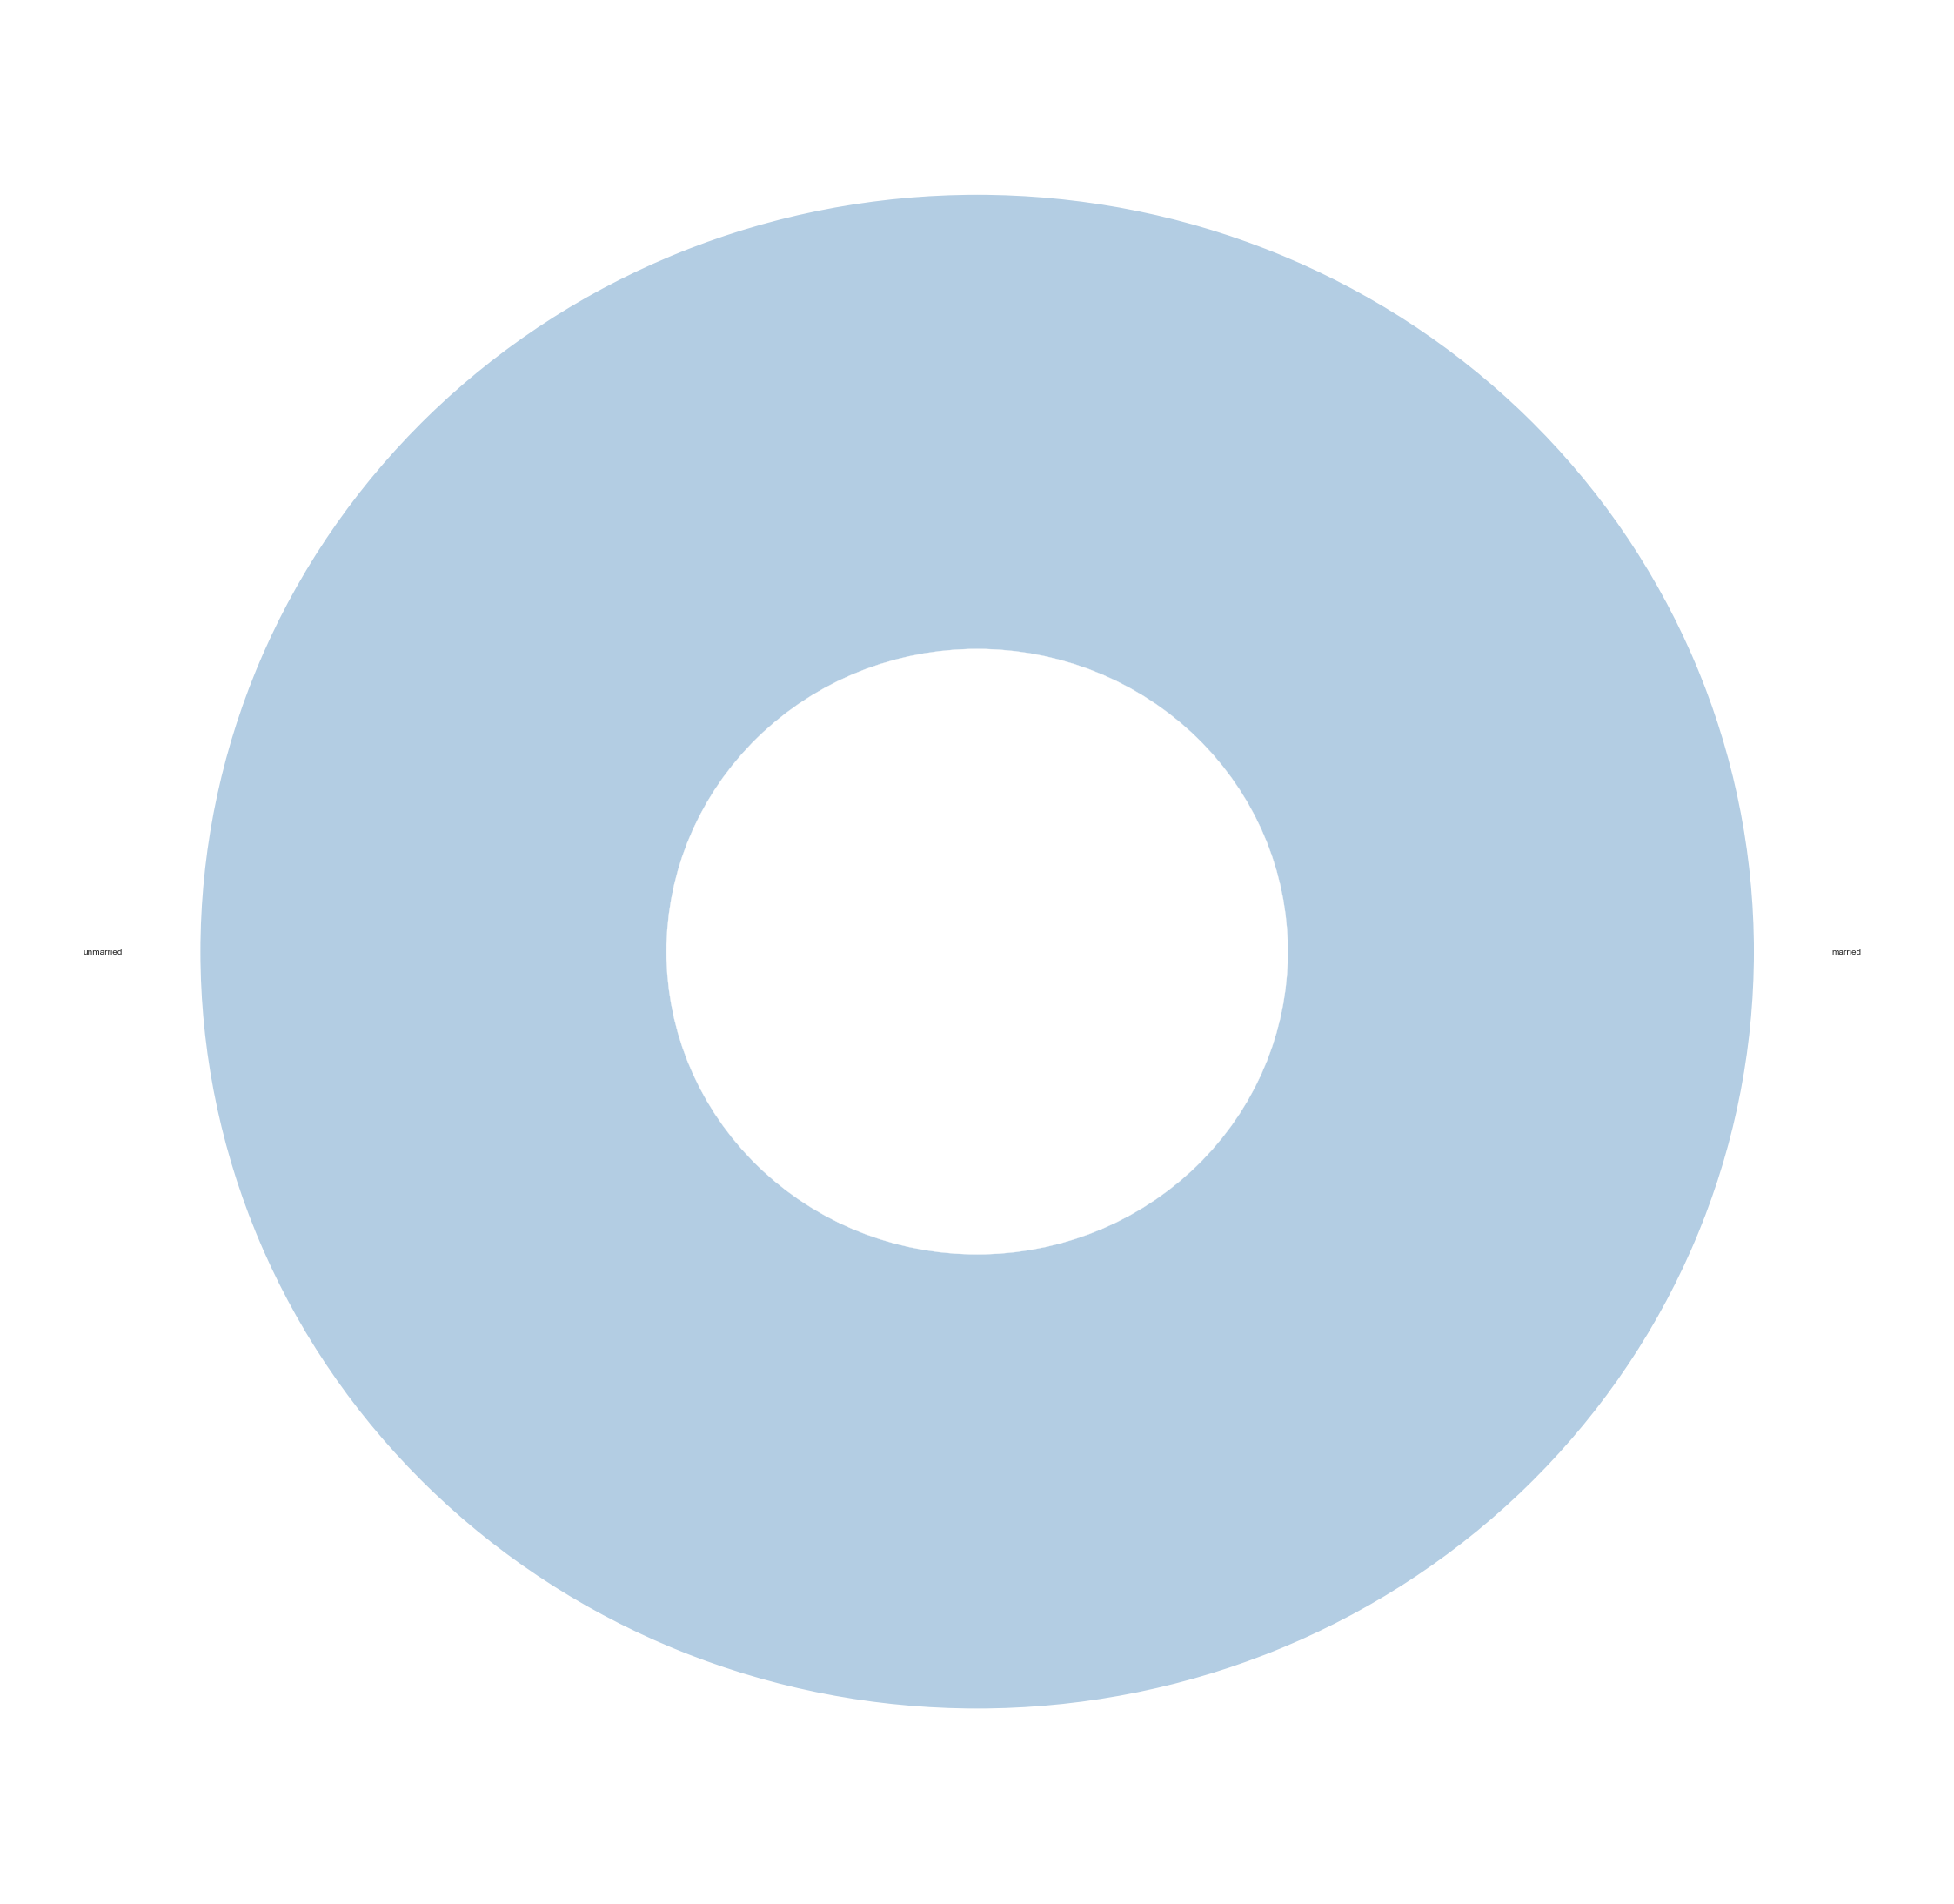

In [169]:
names='married', 'unmarried'
size=[0,1]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.4, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [171]:
#count by gender
race_spo1 = race_.groupby(["gender"])["name"].count()
race_spo1 = pd.DataFrame(race_spo1)
race_spo1 = race_spo1.reset_index().sort_values("name",ascending=0)
race_spo1.reset_index(drop = True)
race_spo1.columns = ['gender', 'Count']
race_spo1

,gender,Count
1,Male,628
0,Female,134
2,Males,1
3,Most likely male,1
4,male,1


In [173]:
#Marriage count by gender
spouse_r1 = spouse.groupby("gender").count()["spouse"]
spouse_r1 = pd.DataFrame(spouse_r1)
spouse_r1 = spouse_r1.reset_index().sort_values("spouse",ascending=0)
spouse_r1.reset_index(drop = True)
spouse_r1.columns = ['gender', 'Count']
spouse_r1

,gender,Count
1,Male,338
0,Female,99
2,Most likely male,1
3,male,1


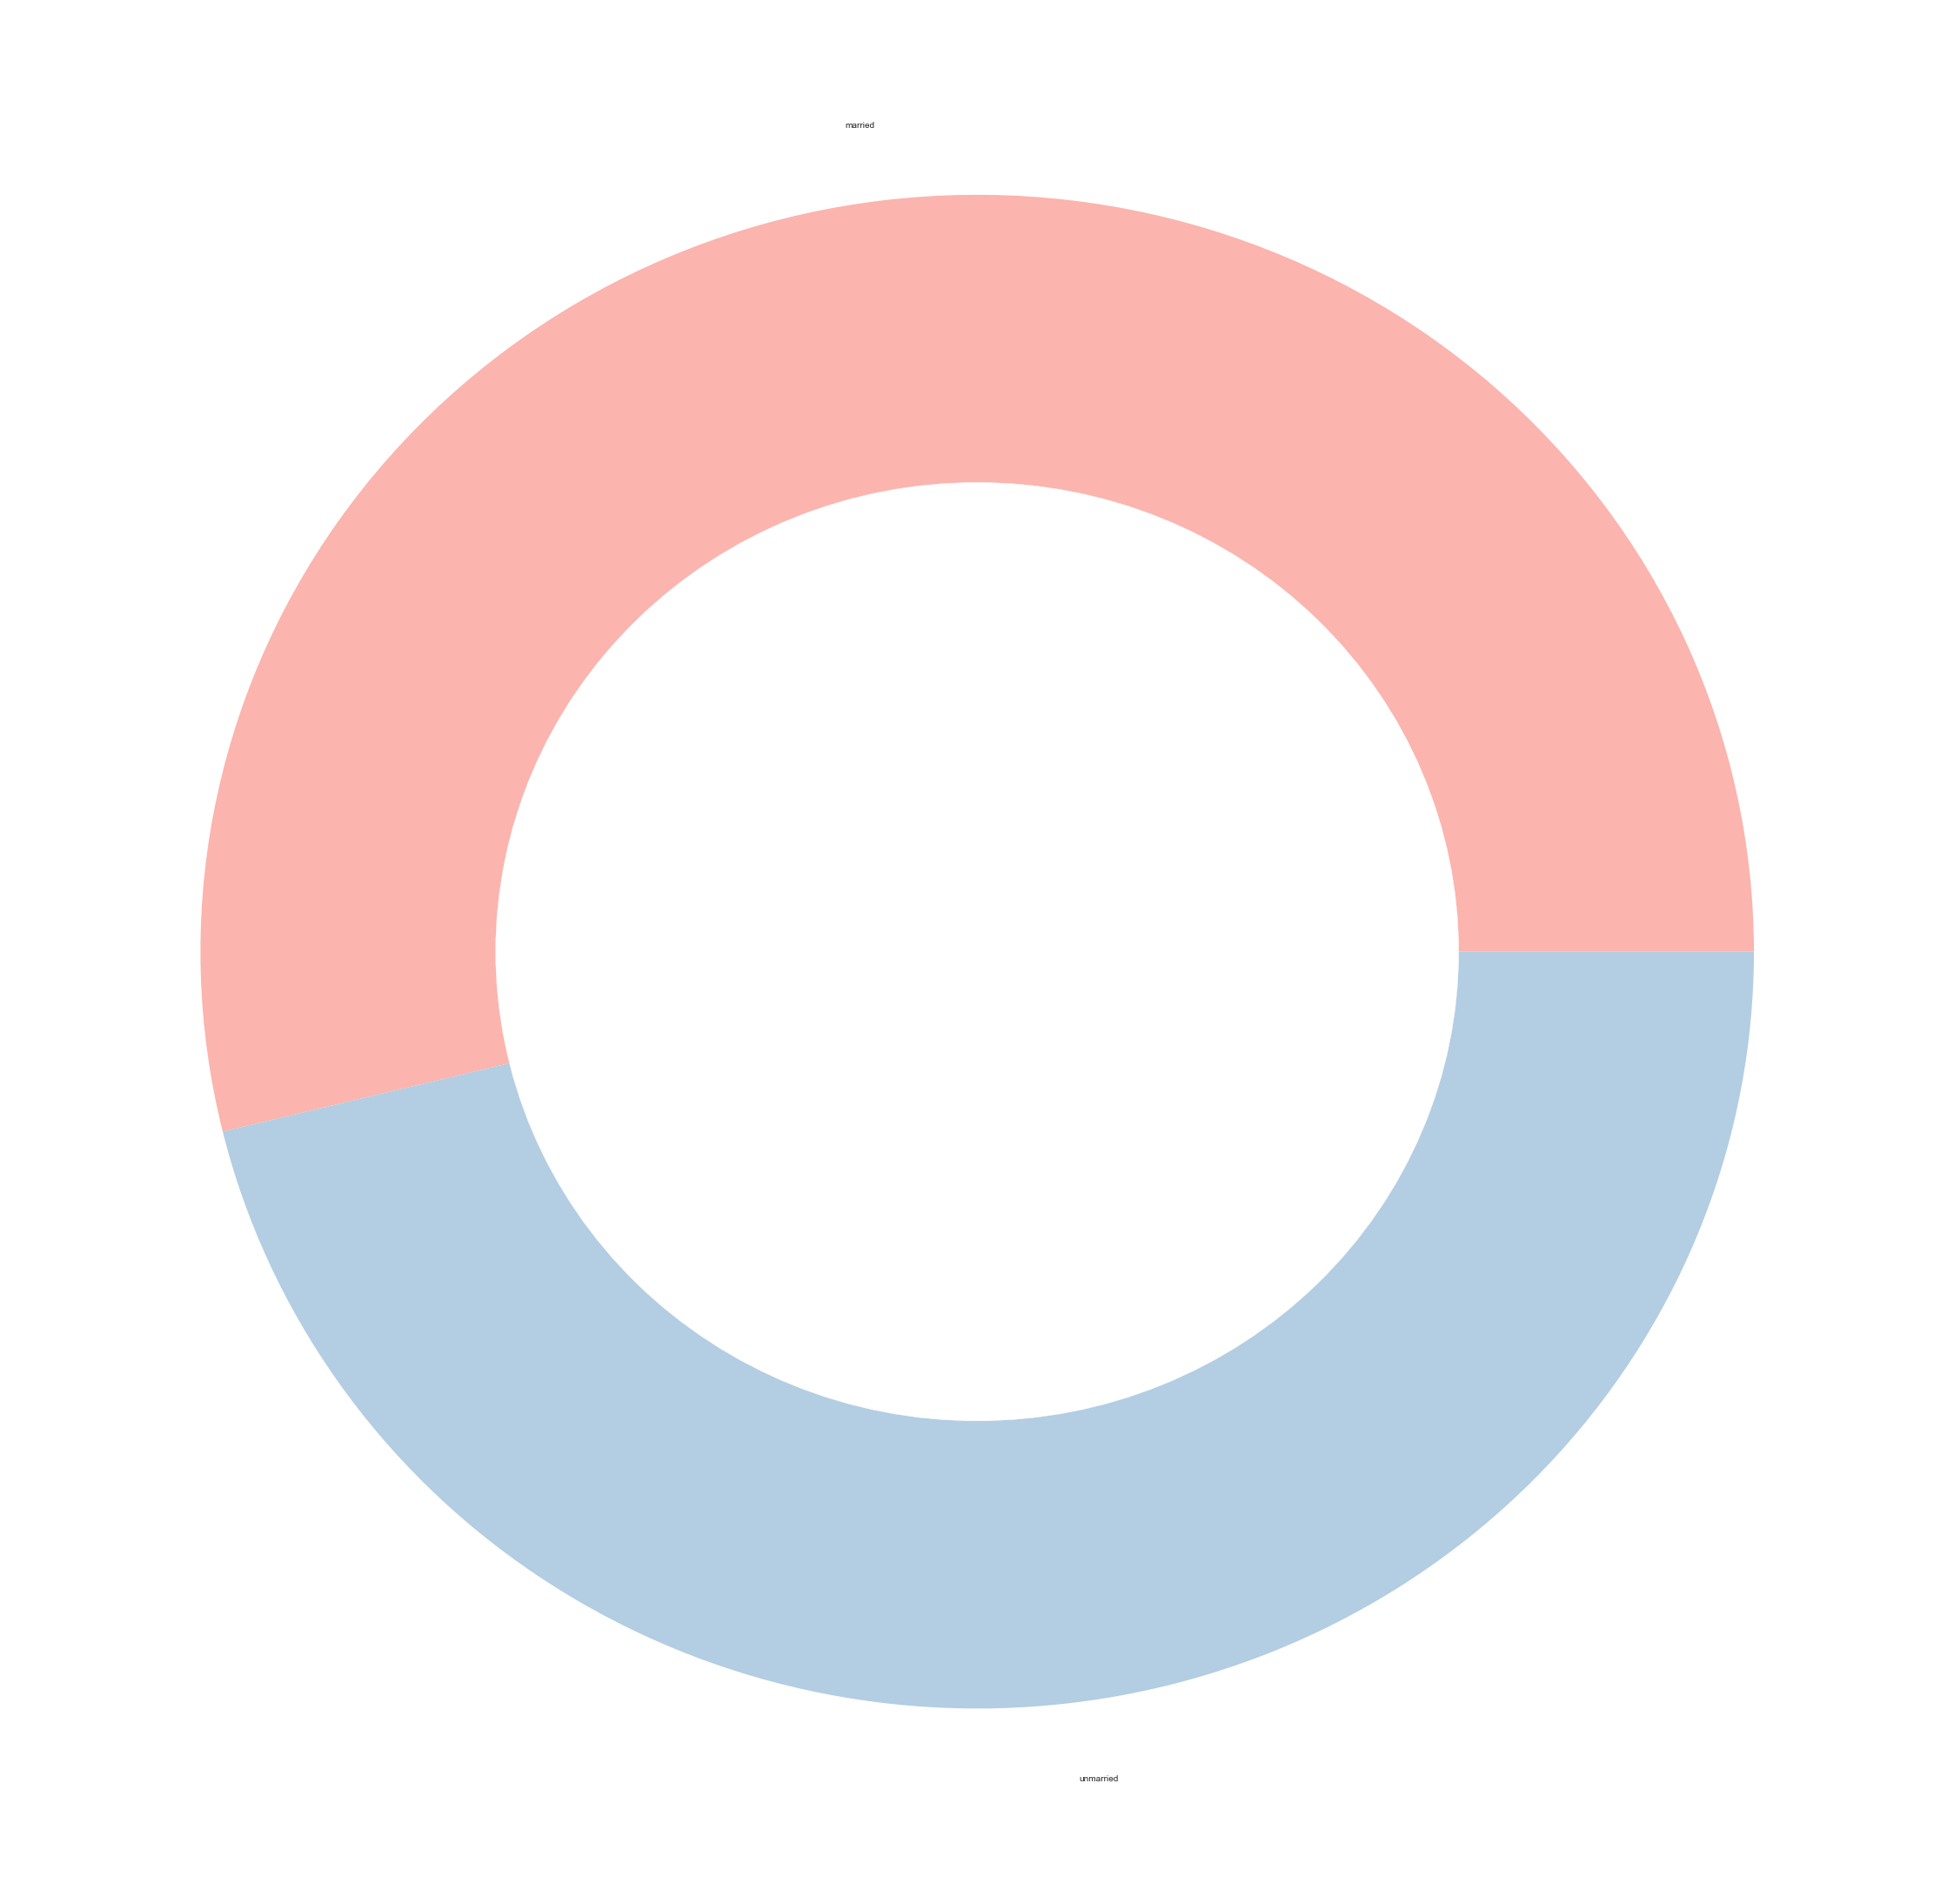

In [174]:
names='married', 'unmarried'
size=[338,290]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.62, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [175]:
99/134

0.7388059701492538

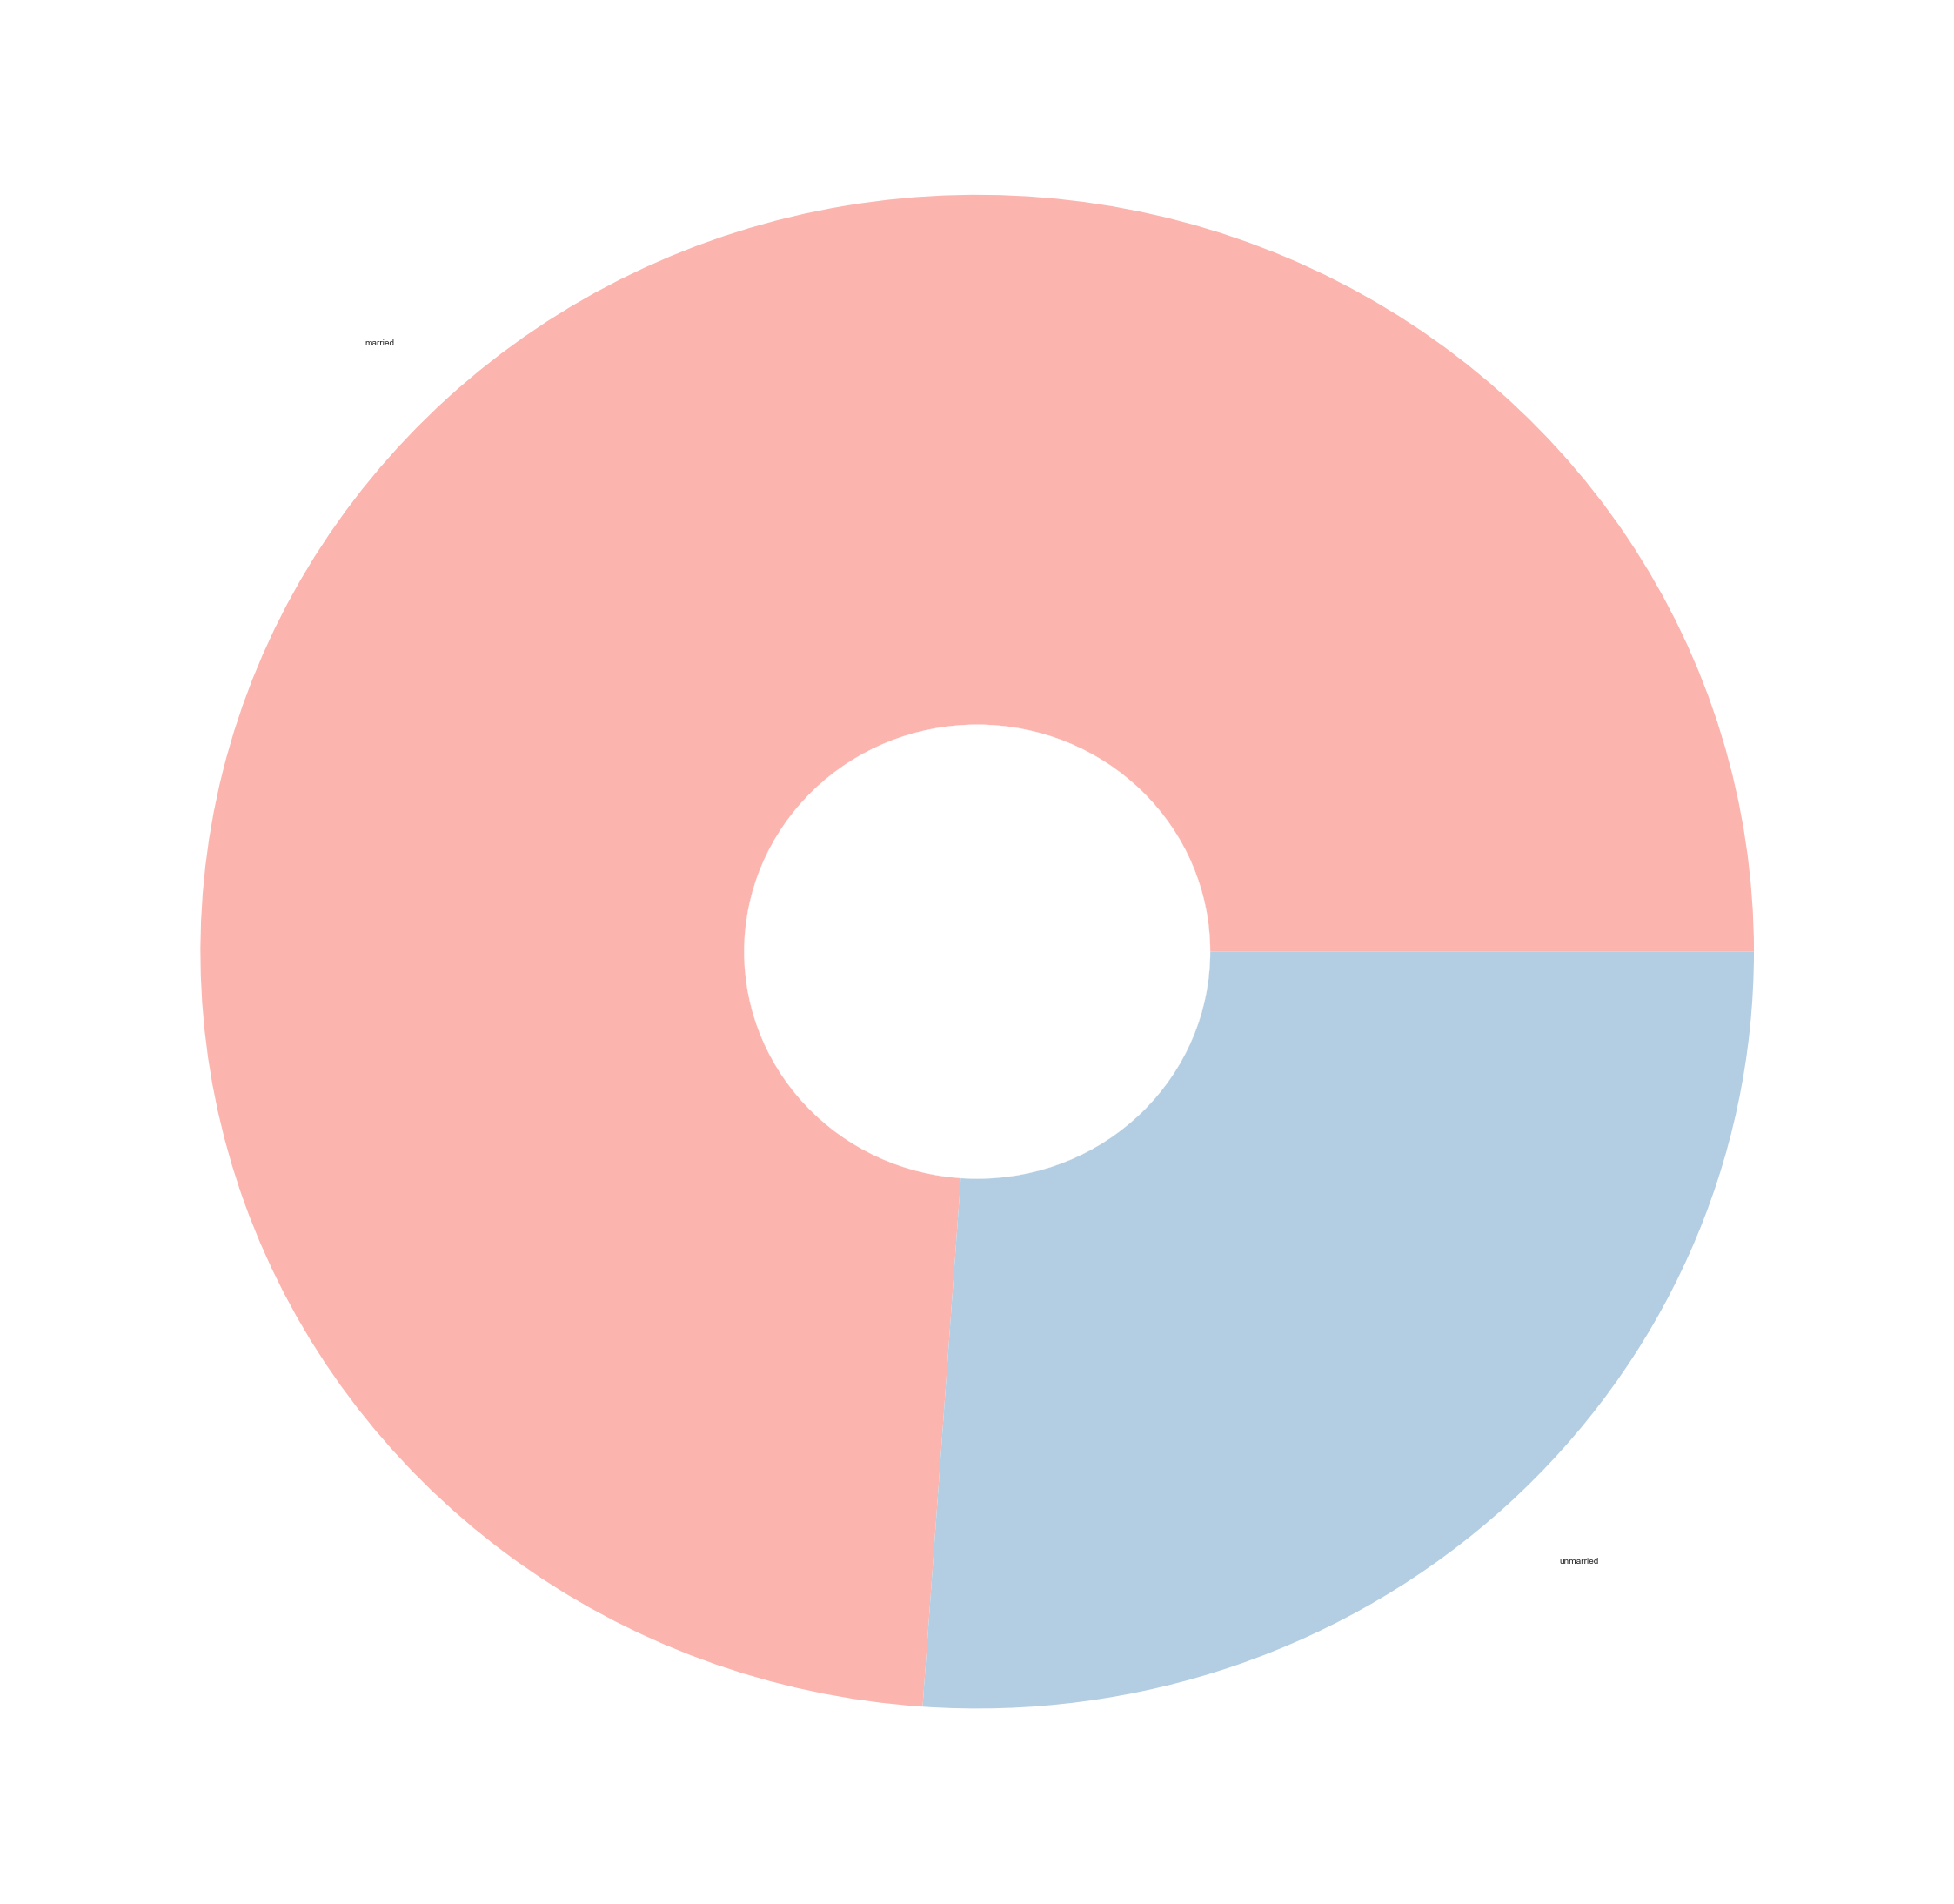

In [176]:
names='married', 'unmarried'
size=[99,35]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.3, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [177]:
mix = race_[["race","name"]]
mix_ = race_[["race","spouse","name"]]
mix_.head(3)

,race,spouse,name
0,Men,Belemir,Adanel
1,Men,NaN,Boromir
2,Orcs,NaN,Lagduf


In [179]:
#Match wife and husband's race info
mix_mer = pd.merge(mix, mix_, how='inner', left_on ='name', right_on ="spouse")
mix_mer ["halfblood"] = np.zeros(len(mix_mer["race_x"]))
mix_mer.head(3)

,race_x,name_x,race_y,spouse,name_y,halfblood
0,Men,Adanel,Men,Adanel,Belemir,0.0
1,Elves,Angrod,Elves,Angrod,Eldalótë,0.0
2,Men,Ar-Pharazôn,Men,Ar-Pharazôn,Tar-Míriel,0.0


In [183]:
#find if interracial marriage
for i in range(len(mix_mer["race_x"])):
    if mix_mer["race_x"][i]== mix_mer["race_y"][i]:
        mix_mer ["halfblood"][i] = False
    else:
        mix_mer ["halfblood"][i] = True
mix_final = mix_mer[mix_mer.halfblood == True]
mix_final['halfblood'] = mix_final.name_y.map(lambda x:x not in list(mix_final["name_x"]))

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [184]:
mix_final = mix_final.reset_index(drop=True)
mix_final = mix_final.loc[[0,1,2,3,5,7,8]]
mix_final

,race_x,name_x,race_y,spouse,name_y,halfblood
0,Elves,Finduilas,Men,Finduilas,Denethor II,True
1,Men,Imrazôr,Elves,Imrazôr,Mithrellas,False
2,Half-elven,Elrond,Elves,Elrond,Celebrían,False
3,Hobbits,Odovacar Bolger,Men,Odovacar Bolger,Rosamunda (Took) Bolger,True
5,Ainur,Melian,Elves,Melian,Thingol,False
7,Ainur,Vairë,Elves,Vairë,Lindo,True
8,Men,Tuor,Elves,Tuor,Idril,True


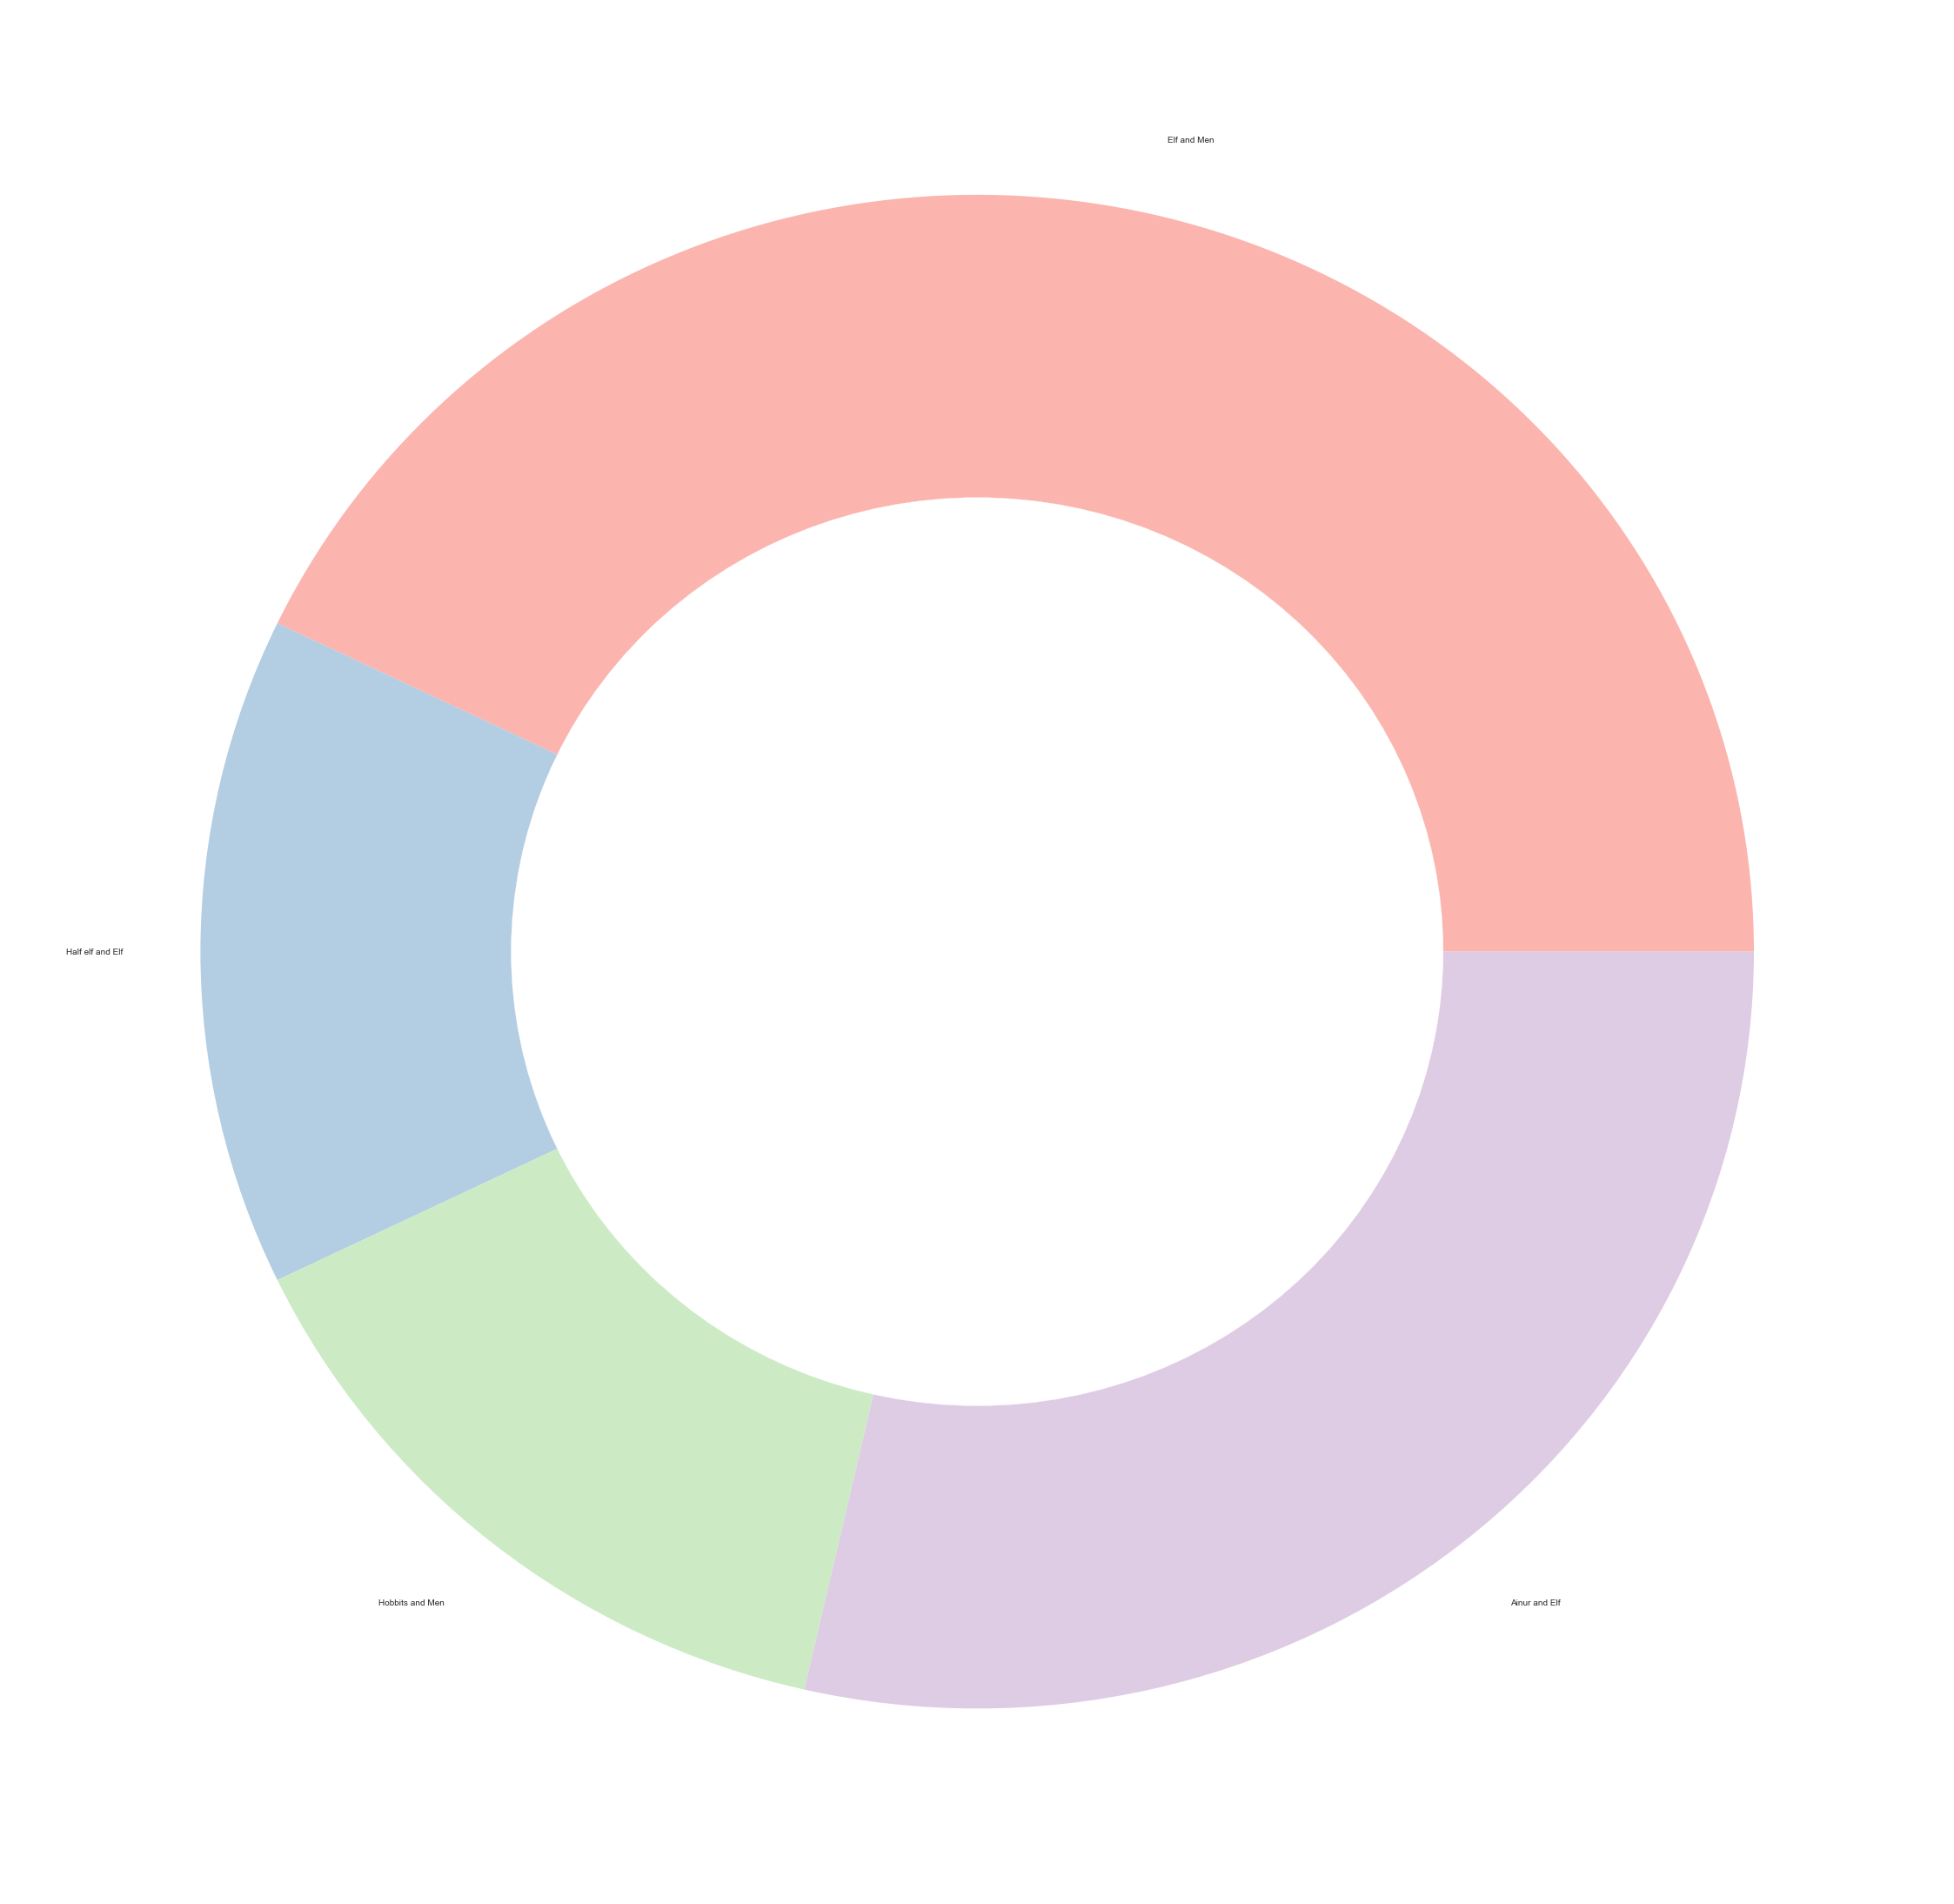

In [187]:
a = {'race' : ["Elf and Men", "Half elf and Elf", 'Hobbits and Men', "Ainur and Elf"], 'count':[3,1,1,2]}
mix__ = pd.DataFrame(a)
names="Elf and Men", "Half elf and Elf", 'Hobbits and Men', "Ainur and Elf"
size=[3,1,1,2]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()
